<center>

# <span style="color:#FF5733;">Analyse des Données & Prédiction des Performances NBA</span>
## <span style="color:#FFC300;">MP Data - Analyse des Joueurs de Basketball</span>
### 🚀🔬 <span style="color:#FF5733;">Projet Technique de Data Science chez MP Data</span> 💡📈

</center>

<p align="center">
  <img src="/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/dev/images/Cover-Sejarah-Tentang-NBA.jpg" width=600>
</p>

### 📝 Auteur: **Rostand Surel** &nbsp;&nbsp;&nbsp; ✉️ Email: [rostandsurel@yahoo.com](mailto:rostandsurel@yahoo.com) &nbsp;&nbsp;&nbsp; 💻 Github: [Manda404](https://github.com/Manda404)

---
**Objectif du Projet:** Utiliser les techniques de Data Science pour analyser et prédire la performance des joueurs de la NBA à partir des données de jeu.

## 🎯 Objectif
Le but de ce projet est de développer un modèle de classification pour prédire si un joueur NBA atteindra ou non une carrière de plus de 5 ans dans la ligue.

## 📋 Description des Caractéristiques de l'Ensemble de Données :

- `GP` : Nombre de matchs joués
- `MIN` : Minutes jouées par match
- `PTS` : Points par match
- `FGM` : Tirs réussis
- `FGA` : Tentatives de tir
- `FG_perc` : Pourcentage de réussite aux tirs
- `ThreeP_Made` : Nombre de tirs à 3 points réussis
- `ThreePA` : Tentatives de tir à 3 points
- `ThreeP_perc` : Pourcentage de réussite aux tirs à 3 points
- `FTM` : Lancers francs réussis
- `FTA` : Tentatives de lancer franc
- `FT_perc` : Pourcentage de réussite aux lancers francs
- `OREB` : Rebonds offensifs
- `DREB` : Rebonds défensifs
- `REB` : Total des rebonds
- `AST` : Passes décisives
- `STL` : Interceptions
- `BLK` : Contres
- `TOV` : Ballons perdus
- `TARGET_5Yrs` : Indicateur si le joueur a joué plus de 5 ans en NBA (1 pour OUI, 0 pour NON)

Les données ont été fournies par l'entreprise MP Data et proviennent d'analyses approfondies des statistiques de joueurs NBA.

---


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importation des bibliothèques requises </div> 

In [51]:
!pip install catboost
!pip install lightgbm
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [56]:
# Gestion des fichiers et du système
import os  # Gestion des fichiers
from datetime import datetime  # Manipulation des dates
import time  # Manipulation du temps
import warnings  # Gestion des avertissements
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Manipulation des données
import numpy as np  # Opérations numériques
import pandas as pd  # Traitement des données tabulaires
import seaborn as sns  # Visualisation de données statistiques
import matplotlib.pyplot as plt  # Visualisation de données
from matplotlib.colors import ListedColormap, LinearSegmentedColormap  # Couleurs pour les graphiques

# Visualisation avancée des données
import plotly.graph_objs as go  # Création de graphiques interactifs
import plotly.express as px  # Création de graphiques expressifs
import plotly.figure_factory as ff  # Création de graphiques avancés
from plotly.subplots import make_subplots  # Création de sous-graphiques

# Traitement des données pour les modèles
from sklearn.decomposition import PCA  # Analyse en composantes principales (PCA)
from sklearn.impute import SimpleImputer  # Imputation des valeurs manquantes
from sklearn.pipeline import Pipeline  # Création de pipelines de traitement
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer  # Transformation de colonnes spécifiques
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
)  # Prétraitement des données

# Évaluation des modèles
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedShuffleSplit,
    ShuffleSplit, RepeatedStratifiedKFold, StratifiedKFold,
    RandomizedSearchCV, GridSearchCV, cross_val_predict
)  # Division des données, validation croisée, recherche d'hyperparamètres

from sklearn.metrics import (
    classification_report, RocCurveDisplay, ConfusionMatrixDisplay,
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    confusion_matrix
)  # Métriques d'évaluation des modèles

# Algorithmes de Machine Learning
from sklearn.ensemble import (
    ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, VotingClassifier
)  # Algorithmes ensemblistes

from sklearn.linear_model import LogisticRegression, RidgeClassifier  # Régressions linéaires
from sklearn.svm import LinearSVC, SVC  # Machines à vecteurs de support
from sklearn.tree import DecisionTreeClassifier  # Arbres de décision
from sklearn.neighbors import KNeighborsClassifier  # K plus proches voisins
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from tqdm import tqdm  # Pour la barre de progression
from plotly.subplots import make_subplots
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
import joblib
from tabulate import tabulate
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Outils supplémentaires
import optuna  # Optimisation des hyperparamètres

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Chargement du jeu de données </div> 

In [22]:
def charger_donnees_csv(chemin_fichier):
    """
    Charge un fichier CSV en tant que DataFrame Pandas tout en gérant les erreurs potentielles.

    :param chemin_fichier: Chemin vers le fichier CSV.
    :return: DataFrame Pandas si la lecture est réussie, None sinon.
    """
    try:
        # Charger les données à partir du fichier CSV
        data = pd.read_csv(chemin_fichier, sep=',')
        # Afficher un aperçu initial des données
        print("Chargement des données réussi. Aperçu des premières lignes :")
        display(data.head())
        return data
    except FileNotFoundError:
        print(f"Erreur : le fichier spécifié '{chemin_fichier}' est introuvable.")
    except pd.errors.EmptyDataError:
        print("Erreur : le fichier est vide.")
    except pd.errors.ParserError:
        print("Erreur : problème de parsing lors de la lecture du fichier.")
    except Exception as e:
        print(f"Une erreur inattendue s'est produite : {e}")
    return None


chemin_fichier = "/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/data/nba_logreg.csv"
data = charger_donnees_csv(chemin_fichier)

Chargement des données réussi. Aperçu des premières lignes :


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [23]:
def renommer_colonnes(data):
    """
    Renomme les colonnes du DataFrame selon un schéma prédéfini et affiche les colonnes avant et après le renommage.

    :param data: DataFrame Pandas à renommer.
    :return: DataFrame Pandas avec les colonnes renommées.
    """
    # Afficher les colonnes avant le renommage
    print("Colonnes avant le renommage :", data.columns.tolist())

    # Dictionnaire de renommage des colonnes
    rename_columns = {
        'FG%': 'FG_perc',
        '3P Made': 'ThreeP_Made',
        '3PA': 'ThreePA',
        '3P%': 'ThreeP_perc',
        'FT%': 'FT_perc'
    }

    # Renommer les colonnes
    data.rename(columns=rename_columns, inplace=True)

    # Afficher les colonnes après le renommage
    print("Colonnes après le renommage :", data.columns.tolist())
    
    return data

data = renommer_colonnes(data)

Colonnes avant le renommage : ['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']
Colonnes après le renommage : ['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_perc', 'ThreeP_Made', 'ThreePA', 'ThreeP_perc', 'FTM', 'FTA', 'FT_perc', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse du dataset </div> 

### 🧪 Résumé et Inspection du Dataset 📝

In [24]:
def resume_inspection_colonnes(data_frame):
    """
    Une fonction utilitaire qui fournit un résumé plus complet des colonnes du dataframe
    que les méthodes intégrées df.info() et df.describe().
    """
    
    total_lignes = len(data_frame)
    resume = pd.DataFrame({
        'Total Lignes': [total_lignes] * data_frame.shape[1],  # Nombre total de lignes dans le dataframe
        'Lignes avec Valeurs Manquantes': data_frame.isnull().sum(),  # Nombre de lignes avec des valeurs manquantes
        'Toutes les Valeurs Uniques': data_frame.nunique() == total_lignes,  # Vérifie si toutes les valeurs sont uniques dans chaque colonne
        'Cardinalité': data_frame.nunique(),  # Nombre de valeurs uniques dans chaque colonne
        'Contient des Valeurs Null': data_frame.isna().any(),  # Indique si la colonne contient des valeurs nulles
        'Pourcentage de Null': round((data_frame.isnull().sum() / total_lignes) * 100, 2),  # Pourcentage de valeurs nulles par rapport au total des lignes
        'Types de Données': data_frame.dtypes,  # Types de données de chaque colonne
        'Spécimens': data_frame.sample(2).T.values.tolist()  # Échantillons aléatoires de 5 lignes pour donner un aperçu des données
    })

    return resume

resultat_summary = resume_inspection_colonnes(data)
display(resultat_summary)
# Affiche le nombre de lignes et de colonnes dans le jeu de données pour donner une première vue d'ensemble.
print("Le jeu de données d'entrée comporte {} lignes et {} colonnes".format(len(data), len(data.columns)))

,Total Lignes,Lignes avec Valeurs Manquantes,Toutes les Valeurs Uniques,Cardinalité,Contient des Valeurs Null,Pourcentage de Null,Types de Données,Spécimens
Name,1340,0,False,1294,False,0.00,object,"[Josh Powell, Charles Smith]"
GP,1340,0,False,70,False,0.00,int64,"[37, 71]"
MIN,1340,0,False,325,False,0.00,float64,"[11.6, 30.4]"
PTS,1340,0,False,191,False,0.00,float64,"[3.0, 16.3]"
FGM,1340,0,False,87,False,0.00,float64,"[1.0, 6.1]"
FGA,1340,0,False,159,False,0.00,float64,"[2.2, 12.4]"
FG_perc,1340,0,False,284,False,0.00,float64,"[45.7, 49.5]"
ThreeP_Made,1340,0,False,23,False,0.00,float64,"[0.0, 0.0]"
ThreePA,1340,0,False,54,False,0.00,float64,"[0.0, 0.0]"
ThreeP_perc,1340,11,False,254,True,0.82,float64,"[0.0, 0.0]"


Le jeu de données d'entrée comporte 1340 lignes et 21 colonnes


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍  Analyse et Observations des Données :</font></h3>

<p align="left">
    <strong>📊 Observation 1:</strong> L'ensemble de données contient <strong>1340</strong> entrées et <strong>21</strong> colonnes.
</p>

<p align="left">
    <strong>📈 Observation 2:</strong> Les données sont complètes et ne contiennent presque pas de valeurs manquantes, à l'exception de la colonne "3P%" qui présente 11 valeurs nulles, représentant 0,82 % du total.
</p>

<p align="left">
    <strong>🔢 Observation 3:</strong> La majorité des variables présentent une forte cardinalité, indiquant une large diversité de valeurs uniques, ce qui enrichit les analyses et les modèles prédictifs.
</p>

<p align="left">
    <strong>💾 Observation 4:</strong> Les types de données sont appropriés pour l'analyse quantitative, avec des variables principalement en format float64, à l'exception de "GP" (int64) et "Name" (objet).
</p>

<p align="left">
    <strong>🎯 Observation 5:</strong> La variable cible "TARGET_5Yrs" a une cardinalité de 2, ce qui indique un problème de classification binaire visant à prédire si un joueur atteindra une carrière de plus de 5 ans en NBA.
</p>

<p align="left">
    <strong>🏀 Observation 6:</strong> Les variables de performance, comme "PTS", "REB", "AST", montrent une grande variabilité entre les individus, idéale pour distinguer les performances et analyser les tendances.
</p>



</div>


## 📊 Statistiques descriptives

In [25]:
# Stylisation et affichage avec la bibliothèque tabulate
def styled_describe(df):
    describe_df = df.describe().T
    describe_df_styled = describe_df.style.set_table_styles([
        {'selector': 'th', 'props': [('background', '#f2f2f2'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background', '#f9f9f9'), ('color', 'black')]},
        {'selector': 'tr:nth-child(odd)', 'props': [('background', '#f2f2f2')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background', 'white')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('color', 'black'), ('font-size', '120%')]}
    ])
    
    return describe_df_styled

# Appel de la fonction pour styliser et afficher les statistiques descriptives
styled_desc = styled_describe(data)
styled_desc

,count,mean,std,min,25%,50%,75%,max
GP,1340.000000,60.414179,17.433992,11.000000,47.000000,63.000000,77.000000,82.000000
MIN,1340.000000,17.624627,8.307964,3.100000,10.875000,16.100000,22.900000,40.900000
PTS,1340.000000,6.801493,4.357545,0.700000,3.700000,5.550000,8.800000,28.200000
FGM,1340.000000,2.629104,1.683555,0.300000,1.400000,2.100000,3.400000,10.200000
FGA,1340.000000,5.885299,3.593488,0.800000,3.300000,4.800000,7.500000,19.800000
FG_perc,1340.000000,44.169403,6.137679,23.800000,40.200000,44.100000,47.900000,73.700000
ThreeP_Made,1340.000000,0.247612,0.383688,0.000000,0.000000,0.100000,0.400000,2.300000
ThreePA,1340.000000,0.779179,1.061847,0.000000,0.000000,0.300000,1.200000,6.500000
ThreeP_perc,1329.000000,19.308126,16.022916,0.000000,0.000000,22.400000,32.500000,100.000000
FTM,1340.000000,1.297687,0.987246,0.000000,0.600000,1.000000,1.600000,7.700000


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Analyse détaillée des statistiques descriptives des Données :</font></h3>


<h4>1. <strong>Participation des joueurs (GP) :</strong></h4>
<ul>
    <li><strong>Distribution :</strong> Le nombre moyen de matchs joués est de 60,4 avec un écart-type de 17,4, indiquant une grande variabilité dans la participation des joueurs. Le minimum est de 11 et le maximum de 82, ce qui reflète des joueurs allant de remplaçants occasionnels à titulaires constants.</li>
    <li><strong>Quartiles :</strong> La moitié des joueurs ont joué entre 47 et 77 matchs, ce qui montre que la majorité a eu une participation significative sur la saison.</li>
</ul>

<h4>2. <strong>Temps de jeu (MIN) :</strong></h4>
<ul>
    <li><strong>Analyse centrale :</strong> Une moyenne de 17,6 minutes et un écart-type de 8,3 minutes montrent que le temps de jeu varie fortement selon le rôle des joueurs. Un maximum de 40,9 minutes suggère des joueurs essentiels, alors que certains jouent peu (minimum de 3,1 minutes).</li>
    <li><strong>Quartiles :</strong> Les 25 % inférieurs jouent environ 10,9 minutes ou moins, tandis que les 25 % supérieurs jouent au moins 22,9 minutes. Cette répartition suggère que la majorité des joueurs ont un rôle important mais non dominant dans l'équipe. Les titulaires principaux qui jouent la majorité des minutes et les joueurs qui ne sont utilisés que ponctuellement (moins de 10 minutes) sont minoritaires.</li>
    <li><strong>Distribution du temps de jeu :</strong> La moitié des joueurs (entre le 25e et le 75e percentile) jouent entre 10,9 et 22,9 minutes par match. Cela montre que la plupart des joueurs ont un temps de jeu modéré, ce qui peut indiquer un équilibre entre les titulaires, qui jouent davantage, et les remplaçants, qui jouent moins.</li>
</ul>

<h4>3. <strong>Points marqués (PTS) :</strong></h4>
<ul>
    <li><strong>Performance globale :</strong> La moyenne de 6,8 points par match et un écart-type de 4,4 indiquent une répartition diversifiée des scores. Le maximum de 28,2 points montre l'existence de joueurs dominants sur le plan offensif.</li>
    <li><strong>Quartiles :</strong>  25 % des joueurs marquent 3,7 points ou moins, tandis que 25 % en marquent 8,8 ou plus.</li>
    <li><strong>Relation potentielle :</strong> La corrélation entre le temps de jeu (MIN) et les points (PTS) pourrait être étudiée pour voir comment le temps passé sur le terrain influence directement la performance offensive.</li>
</ul>

<h4>4. <strong>Précision au tir (FG_perc et ThreeP_perc) :</strong></h4>
<ul>
    <li><strong>FG_perc :</strong> Une moyenne de 44,2 % avec un écart-type de 6,1 % montre une performance standard chez la plupart des joueurs. Les extrêmes (23,8 % à 73,7 %) pourraient indiquer des différences dans la qualité des tirs.</li>
    <li><strong>ThreeP_perc :</strong> Avec un écart-type de 16 %, la précision aux tirs à 3 points varie fortement, soulignant des spécialisations chez certains joueurs (ex. tireurs à 3 points) ou des échantillons restreints avec un taux de réussite parfait (100 %).</li>
</ul>

<h4>5. <strong>Tirs et tentatives (FGM, FGA, ThreeP_Made, ThreePA) :</strong></h4>
<ul>
    <li><strong>Contribution offensive :</strong> La moyenne de 2,63 tirs réussis (FGM) sur 5,88 tentatives (FGA) montre un ratio de tir global raisonnable. Les valeurs de ThreeP_Made et ThreePA révèlent que la majorité des joueurs ne tentent pas ou ne réussissent que peu de tirs à 3 points.</li>
</ul>

<h4>6. <strong>Lancers francs (FTM, FTA, FT_perc) :</strong></h4>
<ul>
    <li><strong>Efficacité et variabilité :</strong> Une moyenne de 70,3 % pour les lancers francs et un écart-type de 10,6 % révèlent une performance moyenne mais hétérogène. Des valeurs minimales (0 %) et maximales (100 %) suggèrent des joueurs très compétents et d'autres moins fiables.</li>
    <li><strong>Potentiel relationnel :</strong> Examiner la corrélation entre le pourcentage de lancers francs (FT_perc) et le nombre de tentatives (FTA) pourrait révéler si les joueurs qui obtiennent plus de tentatives tendent à avoir un meilleur ou un pire pourcentage.</li>
</ul>

<h4>7. <strong>Rebonds (OREB, DREB, REB) :</strong></h4>
<ul>
    <li><strong>Profil des joueurs :</strong> Une moyenne de 3,03 rebonds par match (REB) et un maximum de 13,9 montrent que certains joueurs ont un rôle clé dans les rebonds. La répartition entre rebonds offensifs et défensifs (OREB et DREB) aide à comprendre la spécialisation des joueurs sur le terrain.</li>
</ul>

<h4>8. <strong>Passes décisives (AST), interceptions (STL) et contres (BLK) :</strong></h4>
<ul>
    <li><strong>Contribution globale :</strong> Avec une moyenne de 1,55 pour les passes décisives et un écart-type de 1,47, il y a une variabilité notable dans la capacité à créer des opportunités. Les interceptions et les contres montrent des valeurs moyennes modérées (0,62 et 0,37 respectivement) mais révèlent des outliers significatifs (ex. joueurs avec jusqu'à 2,5 interceptions et 3,9 contres par match).</li>
</ul>

<h4>9. <strong>Pertes de balle (TOV) :</strong></h4>
<ul>
    <li><strong>Analyse des pertes :</strong> La moyenne de 1,19 pertes de balle par match avec un écart-type de 0,72 montre que la gestion du ballon est un facteur à considérer dans l'analyse des performances individuelles.</li>
</ul>

<h4>10. <strong>Variable cible (TARGET_5Yrs) :</strong></h4>
<ul>
    <li><strong>Répartition des classes :</strong> Avec une moyenne de 0,62, environ 62 % des joueurs ont eu une carrière de plus de 5 ans, indiquant un léger déséquilibre entre les classes. Cela pourrait nécessiter des techniques d'ajustement lors de la modélisation pour gérer le déséquilibre des classes.</li>
</ul>

<h4>Conclusion générale et recommandations :</h4>
<ul>
    <li><strong>Variabilité et spécialisation :</strong> Les variables montrent une large distribution et une variabilité qui peut être explorée pour identifier des profils spécifiques de joueurs (par exemple, joueurs polyvalents, spécialistes offensifs/défensifs).</li>
    <li><strong>Analyse de corrélation :</strong> Une étude approfondie des corrélations entre les minutes jouées, les points, les passes et les rebonds pourrait fournir des insights sur les facteurs clés de la performance et du succès d'un joueur en NBA.</li>
    <li><strong>Outliers potentiels :</strong> Les valeurs maximales élevées dans des caractéristiques telles que PTS, AST et REB indiquent la présence de joueurs d'élite ou de performances exceptionnelles qui pourraient influencer les résultats des analyses.</li>
</ul>

<p>Ces observations offrent une base solide pour des analyses ultérieures, comme l'exploration des relations linéaires et non linéaires entre les caractéristiques et la modélisation prédictive.</p>



In [26]:
# Définition de la fonction pour séparer les variables numériques et catégorielles
def separer_variables_numeriques_et_categorielles(data):
    # Partie 1 : Séparation des variables numériques
    donnees_numeriques = data.select_dtypes(include=[np.number]).copy()
    
    # Affichage de la partie numérique
    print("Partie 1. Numérique")
    
    # Vérification si des colonnes numériques existent
    if donnees_numeriques.shape[1] > 0:
        # Affichage du nombre de colonnes numériques
        print('Nombre de colonnes numériques :', donnees_numeriques.shape[1])
        
        # Affichage des colonnes numériques avec des points (•)
        print("Colonnes numériques : ")
        for col in donnees_numeriques.columns:
            print(f"• {col}")
    else:
        print("Aucune colonne numérique trouvée dans les données.")

    # Saut de ligne pour la clarté
    print("")

    # Partie 2 : Séparation des variables catégorielles
    donnees_categorielles = data.select_dtypes(exclude=[np.number]).copy()
    
    # Affichage de la partie catégorique
    print("Partie 2. Catégorique")
    
    # Vérification si des colonnes catégoriques existent
    if donnees_categorielles.shape[1] > 0:
        # Affichage du nombre de colonnes catégoriques
        print('Nombre de colonnes catégoriques :', donnees_categorielles.shape[1])
        
        # Affichage des colonnes catégoriques avec des points (•)
        print("Colonnes catégoriques : ")
        for col in donnees_categorielles.columns:
            print(f"• {col}")
    else:
        print("Aucune colonne catégorique trouvée dans les données.")

    # Retourne les deux datasets séparés
    return donnees_numeriques, donnees_categorielles

In [27]:
numeriques, categoriques = separer_variables_numeriques_et_categorielles(data)

Partie 1. Numérique
Nombre de colonnes numériques : 20
Colonnes numériques : 
• GP
• MIN
• PTS
• FGM
• FGA
• FG_perc
• ThreeP_Made
• ThreePA
• ThreeP_perc
• FTM
• FTA
• FT_perc
• OREB
• DREB
• REB
• AST
• STL
• BLK
• TOV
• TARGET_5Yrs

Partie 2. Catégorique
Nombre de colonnes catégoriques : 1
Colonnes catégoriques : 
• Name


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> EDA (Exploratory Data Analysis) </div> 

### 📊 Visualisation des Labels : Analyse Complète des Proportions et Fréquences 🔍

In [28]:
counts = data.TARGET_5Yrs.value_counts().reset_index()
counts.columns = ['Label', 'Count']

# Créer une figure avec deux sous-graphiques, en spécifiant le type de chaque graphique
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Analyse des Labels - Graphique à Barres", "Répartition des Labels - Graphique en Secteurs"),
    specs=[[{"type": "xy"}, {"type": "domain"}]]  # Utiliser "domain" pour le graphique en secteurs
)

# Graphique à barres interactif
bar_trace = go.Bar(
    x=counts['Label'],
    y=counts['Count'],
    text=[f"{val:,} ({(val / len(data)) * 100:.1f}%)" for val in counts['Count']],
    textposition='outside',
    marker=dict(color=px.colors.qualitative.Set2)
)
fig.add_trace(bar_trace, row=1, col=1)

# Graphique en secteurs interactif
pie_trace = go.Pie(
    labels=counts['Label'],
    values=counts['Count'],
    textinfo='percent+label',
    marker=dict(colors=px.colors.qualitative.Set2),
    hole=0.3  # Pour un graphique en anneau
)
fig.add_trace(pie_trace, row=1, col=2)

# Ajuster la mise en page
fig.update_layout(
    title_text="Analyse des Labels",
    title_font_size=20,
    showlegend=False,
    height=600,
    width=1200
)

# Afficher la figure
fig.show()

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur la colonne cible du Jeu de Données :</font></h3>

<p align="left">
    <strong>1. 📊 Distribution des labels :</strong> Le dataset contient deux classes dans la colonne cible (TARGET_5Yrs) : <br>
    - Le label <strong>1.0</strong> représente 831 observations (61,99% du total). <br>
    - Le label <strong>0.0</strong> représente 509 observations (38,01% du total).
</p>

<p align="left">
    <strong>2. ⚠️ Déséquilibre des classes :</strong> La distribution des classes montre un déséquilibre notable. La classe <strong>1.0</strong> est majoritaire avec environ 62% des observations, tandis que la classe <strong>0.0</strong> est minoritaire avec seulement 38%. Cet écart peut poser des problèmes lors de la modélisation, tels qu'une performance biaisée du modèle en faveur de la classe majoritaire.
</p>

<p align="left">
    <strong>3. 💡 Impact potentiel sur la modélisation :</strong> Un tel déséquilibre nécessite de prendre des mesures pour assurer une évaluation équitable du modèle, telles que : <br>
    - 🔄 L'application de techniques de rééchantillonnage (sur-échantillonnage de la classe minoritaire ou sous-échantillonnage de la classe majoritaire). <br>
    - 📈 L'utilisation de métriques adaptées comme la <strong>moyenne harmonique</strong> (F1-score) ou la <strong>matrice de confusion</strong> pour évaluer la performance du modèle.
</p>

</div>


In [29]:
def plot_histograms(df_numerical):
    # Vérification si la colonne 'TARGET_5Yrs' existe dans le DataFrame
    if 'TARGET_5Yrs' in df_numerical.columns:
        # Retrait de la colonne 'TARGET_5Yrs'
        df_numerical = df_numerical.drop(columns=['TARGET_5Yrs'])

    # Définition des sous-graphiques
    num_cols = len(df_numerical.columns)
    nrows = (num_cols // 2) + (num_cols % 2)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(25, nrows * 4))

    # Boucle pour tracer les histogrammes pour chaque variable continue
    for i, col in enumerate(df_numerical.columns):
        x = i // 2
        y = i % 2
        values, bin_edges = np.histogram(df_numerical[col],
                                         range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max())))

        graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                             edgecolor='none', color='tomato', alpha=0.5)
        ax[x, y].set_xlabel(col, fontsize=15)
        ax[x, y].set_ylabel('Count', fontsize=12)
        ax[x, y].set_xticks(np.round(bin_edges, 1))
        ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
        ax[x, y].grid(color='lightgrey')

        for j, p in enumerate(graph.patches):
            ax[x, y].annotate('{}'.format(int(p.get_height())), 
                              (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                              ha='center', fontsize=10, fontweight="bold")

        # Afficher la moyenne et l'écart-type
        textstr = '\n'.join((
            r'$\mu=%.2f$' % df_numerical[col].mean(),
            r'$\sigma=%.2f$' % df_numerical[col].std()
        ))
        ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                      color='black', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', pad=0.5))

    # Ajustement final
    plt.suptitle('Distribution des Variables Numériques', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


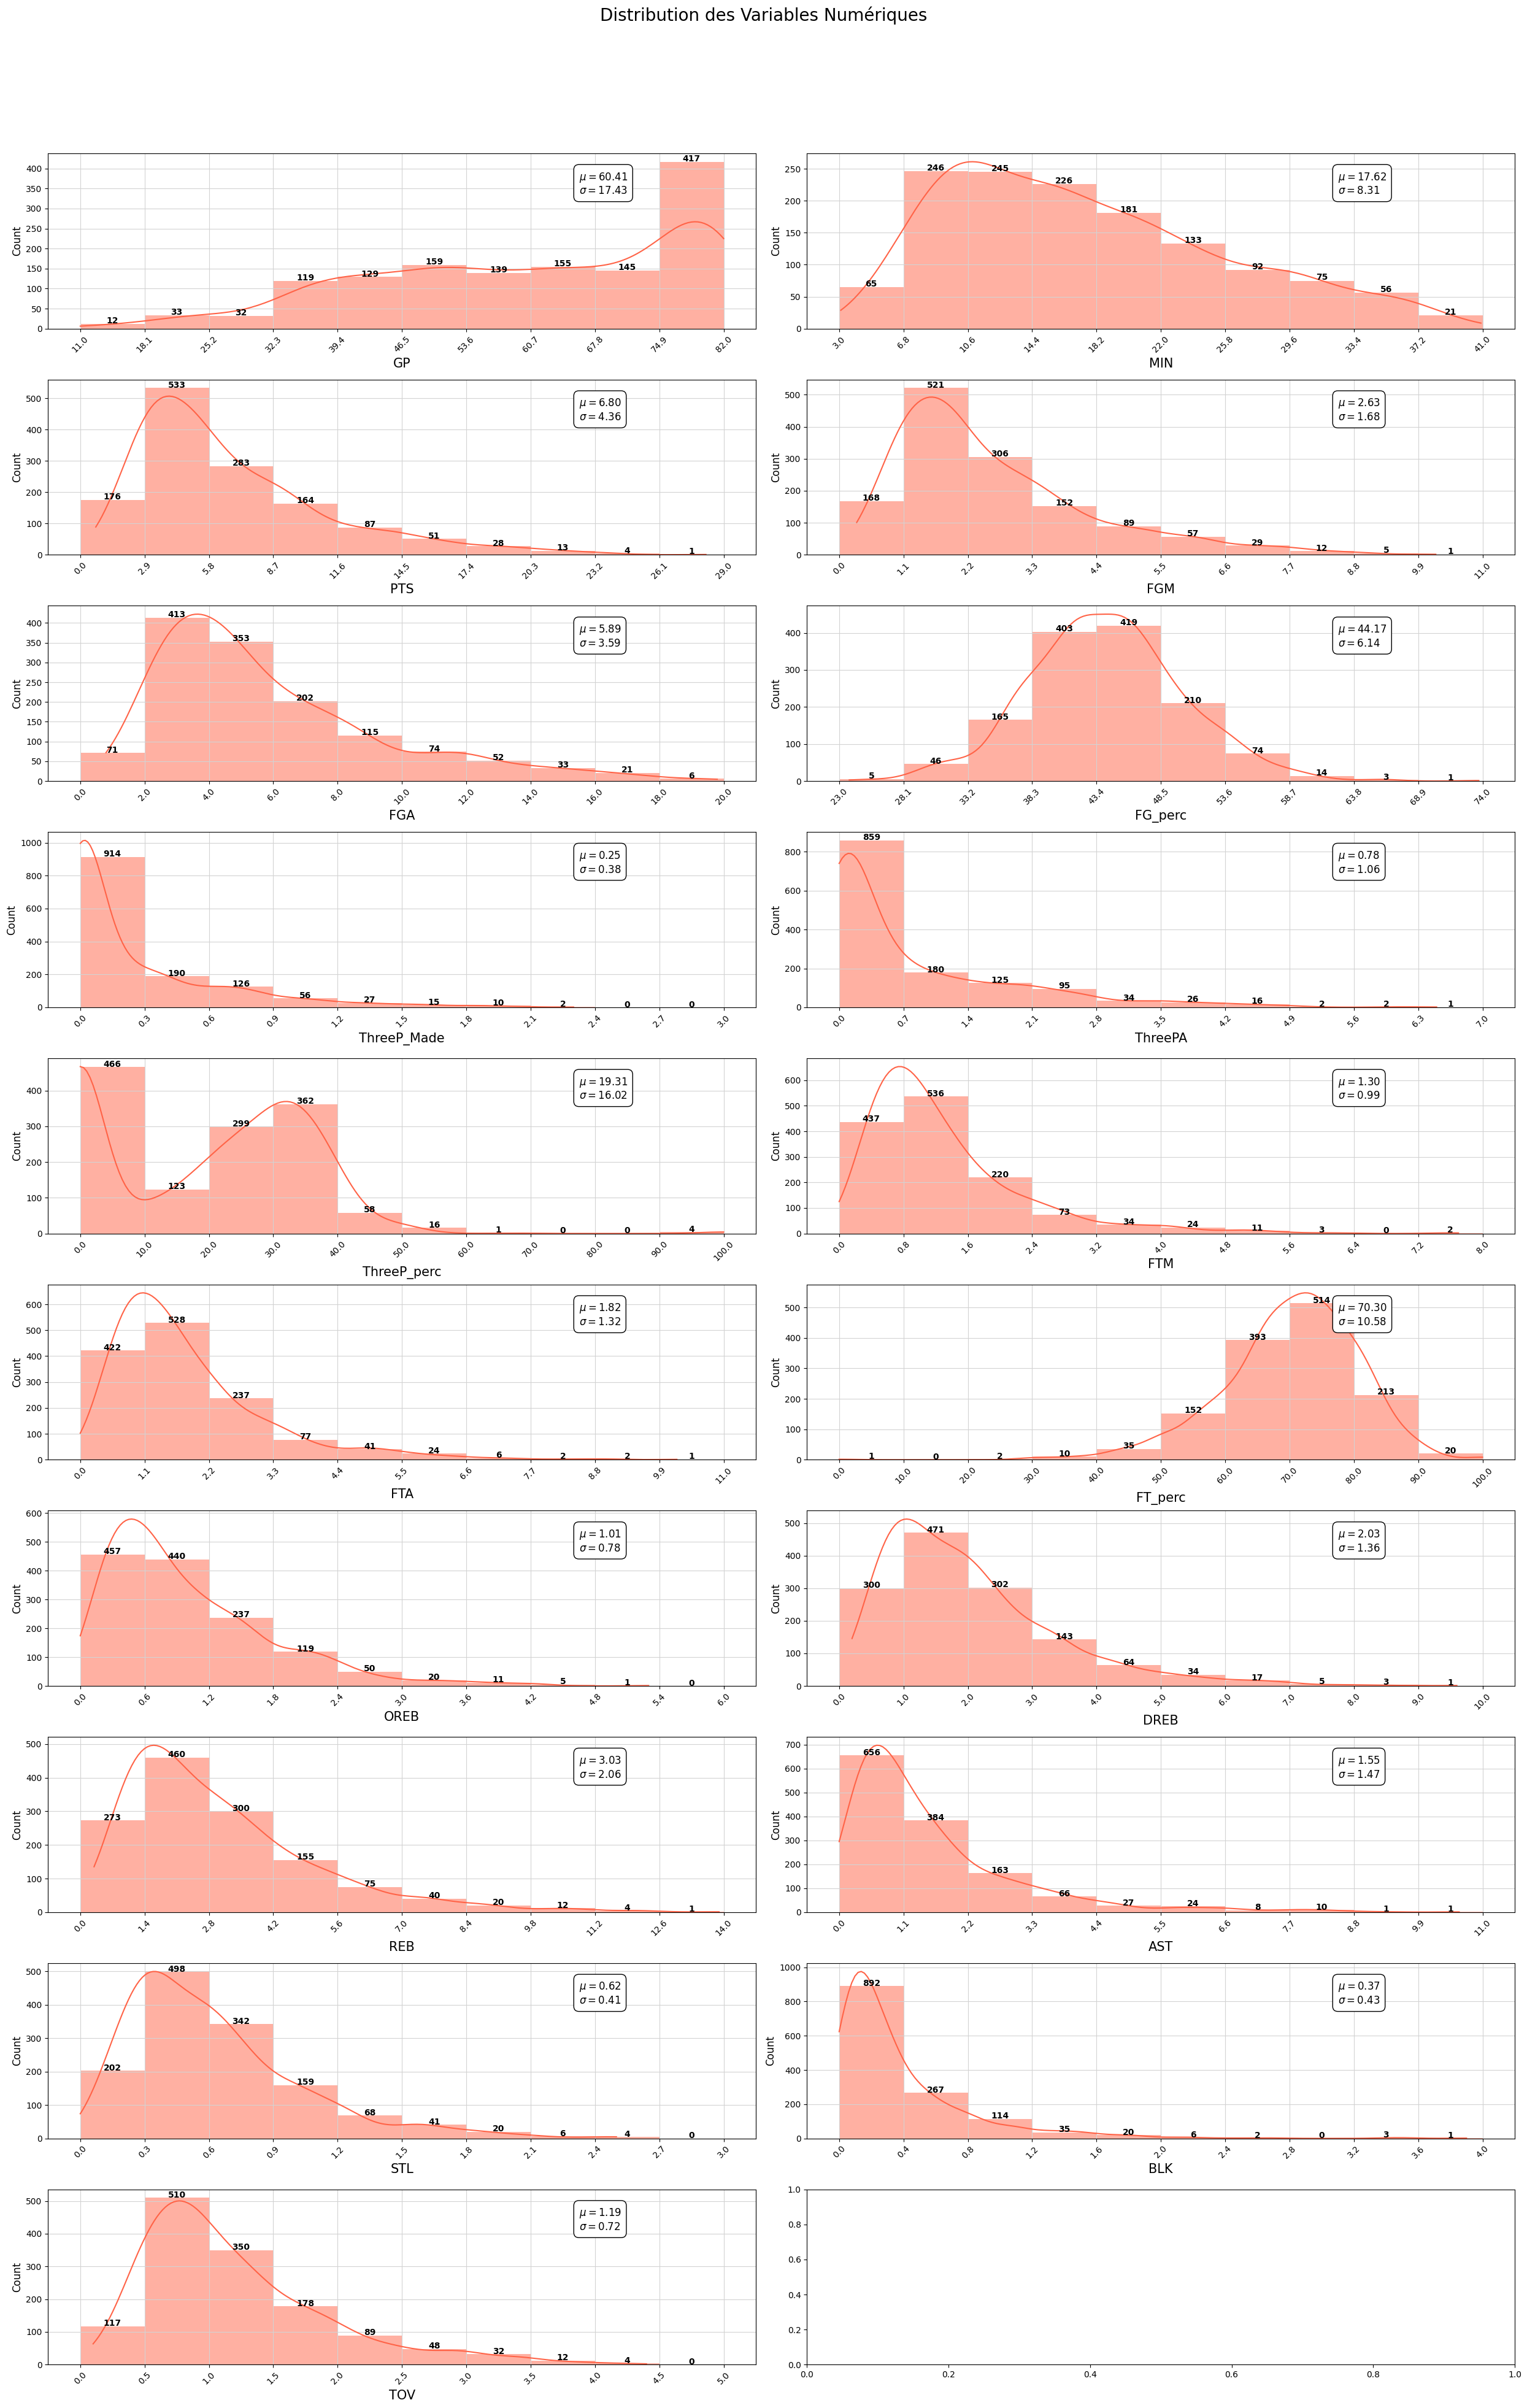

In [30]:
   plot_histograms(numeriques)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Synthèse des Observations sur la Distribution des Variables :</font></h3>

<p align="left">
    L'analyse des distributions des variables du dataset révèle des aspects importants qui peuvent guider les étapes d'analyse et de modélisation :
</p>

<p align="left">
    <strong>1. Présence d'asymétrie :</strong> La majorité des variables présentent une asymétrie marquée vers la droite. Cela indique que beaucoup de joueurs ont des valeurs basses, tandis qu'une minorité a des valeurs élevées. Par exemple, les variables <em>PTS</em>, <em>AST</em>, et <em>BLK</em> montrent des asymétries importantes.
</p>

<p align="left">
    <strong>2. Outliers significatifs :</strong> Certaines variables, comme <em>PTS</em> et <em>BLK</em>, comportent des valeurs extrêmes. Ces outliers représentent des joueurs ayant des performances exceptionnelles et doivent être pris en compte pour éviter que l'analyse ou la modélisation ne soit biaisée.
</p>

<p align="left">
    <strong>3. Variabilité des distributions :</strong> L'écart-type élevé de certaines variables, telles que <em>MIN</em> et <em>PTS</em>, montre une grande variabilité parmi les joueurs. Cela peut être exploité dans l'analyse des facteurs influençant la performance.
</p>

<p align="left">
    <strong>4. Variables spécialisées :</strong> Des variables comme <em>ThreeP_Made</em> et <em>BLK</em> ont une distribution avec une grande concentration autour de zéro, reflétant la spécialisation de certains joueurs dans ces aspects du jeu.
</p>

<p align="left">
    <strong>5. Implications pour la modélisation :</strong> La gestion des distributions asymétriques, la normalisation des données et la prise en compte des outliers seront cruciales pour construire des modèles robustes. Les variables à forte variabilité, comme <em>PTS</em> et <em>MIN</em>, pourraient jouer un rôle clé dans les modèles de prédiction.
</p>

<p align="left">
    En résumé, la distribution des variables montre une diversité des rôles et des contributions des joueurs, avec des aspects clés à considérer pour le prétraitement et la modélisation future.
</p>

<p align="left">
    <strong>🔑 Implications pour la modélisation :</strong> La variabilité marquée et les asymétries observées indiquent la nécessité de transformations ou de normalisations pour certaines variables avant la modélisation. Les variables présentant des outliers importants devront être traitées pour éviter qu'elles influencent de manière disproportionnée les modèles de classification. De plus, une attention particulière doit être accordée aux relations potentielles entre les minutes jouées, les points et les passes décisives pour identifier les facteurs de succès prédictifs.
</p>

</div>


### 🏀 Analyse détaillée des distributions

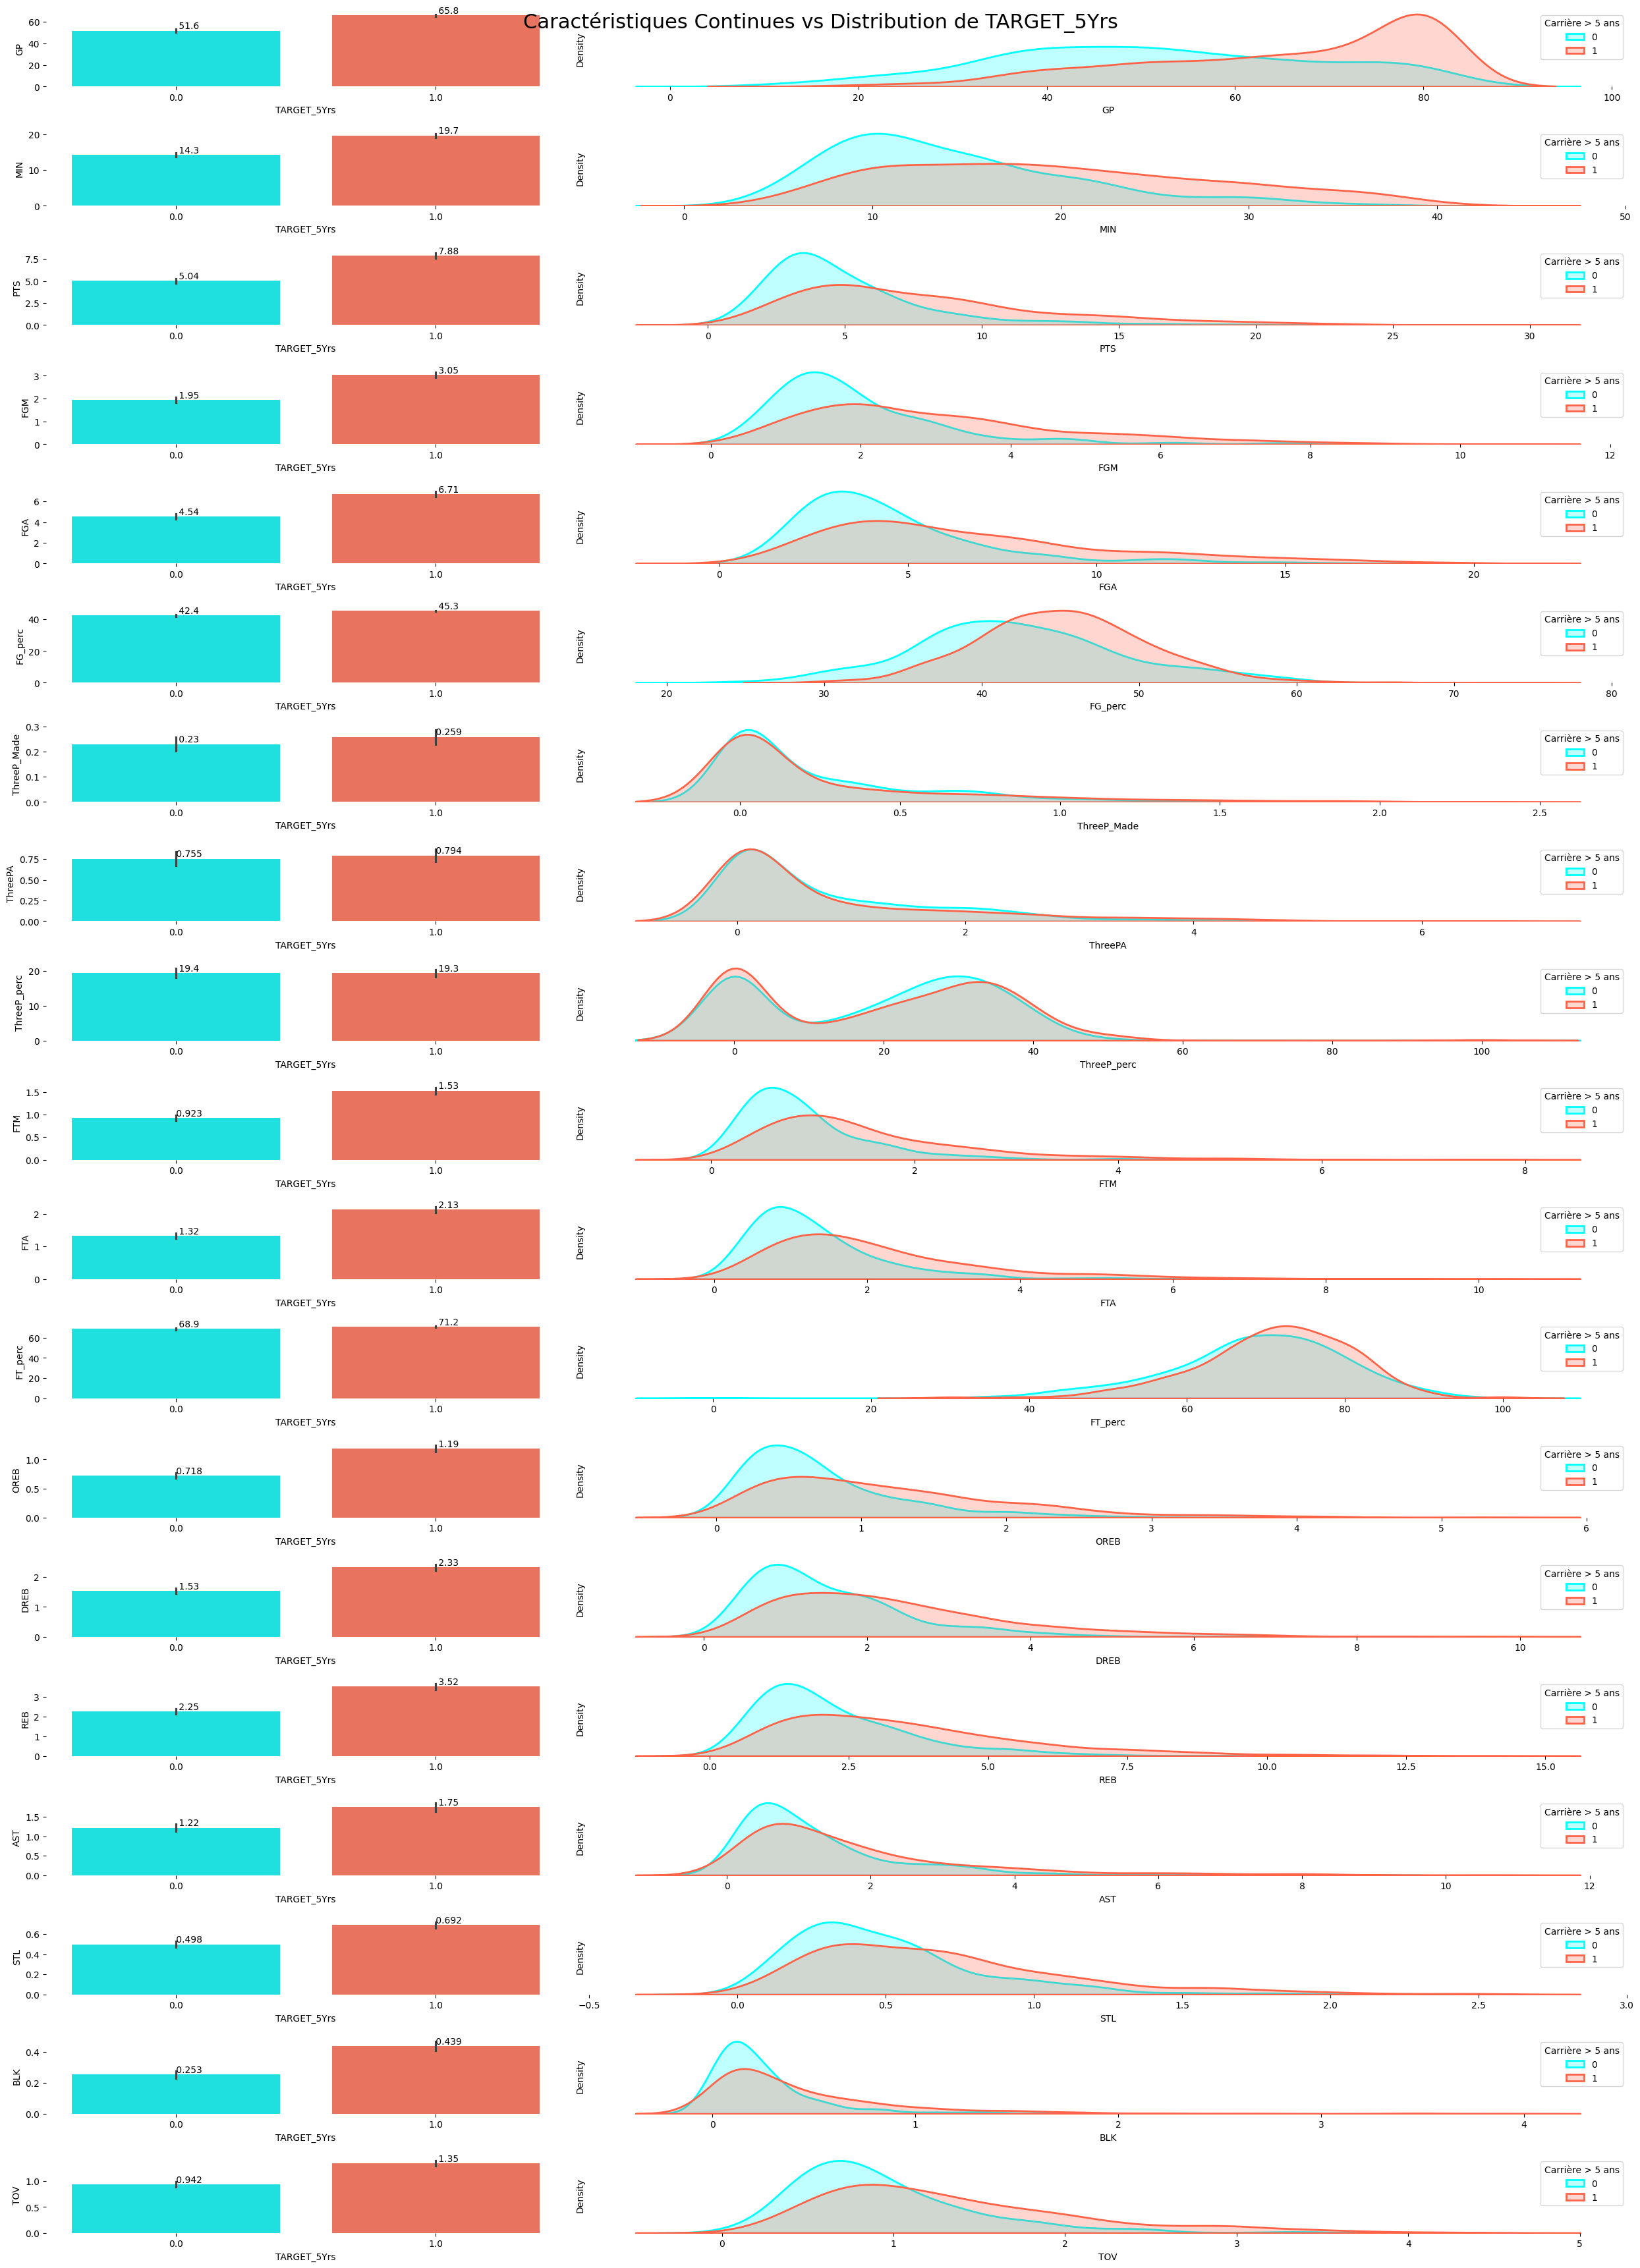

In [31]:
def plot_continuous_features(df, numerical_columns):
    # Set color palette
    sns.set_palette(['cyan', 'tomato'])

    # Create the subplots
    fig, ax = plt.subplots(len(numerical_columns), 2, figsize=(25,35), gridspec_kw={'width_ratios': [1, 2]})

    # Loop through each continuous feature to create barplots and kde plots
    for i, col in enumerate(numerical_columns):
        # Barplot showing the mean value of the feature for each target category
        graph = sns.barplot(data=df, x="TARGET_5Yrs", y=col, ax=ax[i,0], hue="TARGET_5Yrs")
        ax[i,0].legend_.remove()

        # KDE plot showing the distribution of the feature for each target category
        sns.kdeplot(data=df[df["TARGET_5Yrs"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
        sns.kdeplot(data=df[df["TARGET_5Yrs"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
        ax[i,1].set_yticks([])
        ax[i,1].legend(title='Carrière > 5 ans', loc='upper right')

        # Remove outer border barplot
        for spine in ax[i,0].spines.values():
            spine.set_visible(False)

        # Remove outer border kde plot
        for spine in ax[i,1].spines.values():
            spine.set_visible(False)

        # Add mean values to the barplot
        for cont in graph.containers:
            graph.bar_label(cont, fmt='         %.3g')

    # Set the title for the entire figure
    plt.suptitle('Caractéristiques Continues vs Distribution de TARGET_5Yrs', fontsize=22)
    plt.tight_layout()
    plt.show()

# Colonne cible à exclure
target_column = 'TARGET_5Yrs'

# Sélectionner les colonnes numériques pour l'analyse
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# Supprimer la colonne cible de la liste des colonnes numériques si elle est présente
numerical_features.remove(target_column)

# Appel de la fonction avec le DataFrame `data` et les colonnes numériques à visualiser
plot_continuous_features(data, numerical_features)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur la colonne cible du Jeu de Données :</font></h3>

<p align="left">
    Voici une analyse détaillée de la figure fournie, mettant en évidence les observations clés et les implications pour l'analyse de données des joueurs de basket :
</p>

<h4>🎯 <strong>Analyse générale des distributions :</strong></h4>
<p align="left">
    - <strong>Comparaison des distributions :</strong> Les graphes montrent comment chaque variable numérique est répartie en fonction de la variable cible <code>TARGET_5Yrs</code> (indiquant si un joueur a une carrière de plus de 5 ans). Les distributions en bleu représentent les joueurs qui n'ont pas eu une carrière de plus de 5 ans, tandis que les distributions en rouge représentent ceux qui ont eu une carrière de plus de 5 ans. <br>
    - <strong>Variabilité des distributions :</strong> La majorité des variables montrent une certaine variabilité entre les deux groupes, suggérant que certaines caractéristiques pourraient influencer la longévité de la carrière d'un joueur.
</p>

<h4>🔍 <strong>Observations spécifiques par variable :</strong></h4>
<p align="left">
    <strong>1. GP (Games Played) :</strong><br>
    - Les joueurs ayant une carrière de plus de 5 ans (en rouge) ont tendance à avoir un plus grand nombre de matchs joués. Cela peut indiquer que la participation régulière est un indicateur important de longévité dans la carrière.
</p>
<p align="left">
    <strong>2. MIN (Minutes jouées) :</strong><br>
    - La distribution des minutes jouées montre que les joueurs avec une carrière prolongée ont tendance à avoir un temps de jeu plus élevé. Cela suggère que les joueurs clés avec plus de responsabilités sur le terrain ont plus de chances de prolonger leur carrière.
</p>
<p align="left">
    <strong>3. PTS (Points par match) :</strong><br>
    - Les joueurs ayant une carrière de plus de 5 ans montrent une légère tendance à avoir un nombre de points par match plus élevé. Cela pourrait indiquer que la capacité à marquer des points est un facteur influençant la durée de la carrière.
</p>
<p align="left">
    <strong>4. FGM et FGA (Field Goals Made/Attempted) :</strong><br>
    - Les distributions montrent que les joueurs qui réussissent plus de tirs et tentent plus de tirs ont tendance à rester plus longtemps dans la ligue, ce qui est cohérent avec leur rôle offensif accru.
</p>
<p align="left">
    <strong>5. ThreeP_Made et ThreePA (Tirs à 3 points réussis et tentés) :</strong><br>
    - Les distributions montrent que les joueurs ayant une carrière de plus de 5 ans ne se distinguent pas particulièrement par leur capacité à réussir ou tenter des tirs à 3 points, indiquant que ce n'est peut-être pas un facteur décisif pour la longévité.
</p>
<p align="left">
    <strong>6. Rebonds (OREB, DREB, REB) :</strong><br>
    - Les rebonds, surtout défensifs (DREB) et totaux (REB), montrent que les joueurs ayant une carrière de plus de 5 ans ont une contribution légèrement supérieure dans cette catégorie, ce qui peut indiquer leur importance dans le jeu global.
</p>
<p align="left">
    <strong>7. Passes décisives (AST) :</strong><br>
    - Les joueurs qui distribuent plus de passes décisives semblent avoir une meilleure longévité, ce qui peut indiquer que les joueurs polyvalents et capables de contribuer à la création de jeu ont un avantage.
</p>
<p align="left">
    <strong>8. Interceptions (STL) et Contres (BLK) :</strong><br>
    - Les distributions montrent que les interceptions et les contres ne sont pas des indicateurs majeurs de la longévité, bien que certains joueurs puissent exceller dans ces domaines.
</p>
<p align="left">
    <strong>9. TOV (Turnovers) :</strong><br>
    - La distribution des pertes de balle montre que les joueurs ayant une carrière plus longue ont des pertes de balle légèrement plus élevées. Cela peut s'expliquer par le fait que ces joueurs ont généralement un rôle plus actif et prennent plus de risques.
</p>

<h4>💡 <strong>Implications pour l'analyse des données et la modélisation :</strong></h4>
<p align="left">
    - <strong>Identification des variables importantes :</strong> Les distributions montrent que des variables telles que <code>GP</code>, <code>MIN</code>, <code>PTS</code>, <code>REB</code> et <code>AST</code> pourraient être des indicateurs importants pour prédire la longévité d'une carrière.<br>
    - <strong>Prétraitement des données :</strong> Certaines variables présentent des distributions asymétriques et pourraient nécessiter une transformation (log ou Box-Cox) pour améliorer la performance du modèle.<br>
    - <strong>Approfondissement de l'analyse :</strong> Des analyses de corrélation et l'utilisation de modèles de machine learning avec des scores d'importance des features aideraient à confirmer la pertinence de ces variables pour la prédiction.
</p>

<p align="left">
    Ces observations fournissent une base solide pour orienter la sélection des caractéristiques et guider les prochaines étapes de la modélisation prédictive, visant à comprendre quels facteurs influencent la longévité de la carrière des joueurs en NBA.
</p>

</div>

### 🚨 Détection et Traitement des Valeurs Aberrantes 🔧

In [32]:
def get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(first_quartile)  # xth percentile / 1st quartile
    q3 = df_in[col_name].quantile(third_quartile)  # yth percentile / 3rd quartile
    iqr = q3 - q1  # Interquartile range
    minimum = q1 - (1.5 * iqr)  # The minimum value or the |- marker in the box plot
    maximum = q3 + (1.5 * iqr)  # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def detect_and_count_outliers(df_in, list_des_colonnes, first_quartile, third_quartile):
    result_data = []
    for col_name in list_des_colonnes:
        outlier_count = count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
        total_count = len(df_in)
        outlier_percentage = round((outlier_count / total_count) * 100, 2)
        result_data.append([col_name, outlier_count, outlier_percentage])
    
    result_df = pd.DataFrame(result_data, columns=['Column Name', 'Number of Outliers', 'Percentage of Outliers(%)'])
    return result_df

def visualize_outliers(df):
    # Trier le DataFrame par le nombre de valeurs aberrantes dans l'ordre décroissant
    df = df.sort_values(by='Number of Outliers', ascending=False)
    
    fig = px.bar(df, x='Column Name', y='Number of Outliers',
                 labels={'Column Name': 'Nom de la colonne', 'Number of Outliers': 'Nombre de valeurs aberrantes'},
                 title='Nombre de valeurs aberrantes par colonne',
                 text='Percentage of Outliers(%)')
    fig.update_traces(texttemplate='%{text}%', textposition='outside')
    fig.show()
   
first_quartile, third_quartile = 0.25, 0.75
df_outliers_info = detect_and_count_outliers(data, numerical_features, first_quartile, third_quartile)
visualize_outliers(df_outliers_info)

## Analyse des Outliers

Le graphique montre que la colonne `BLK` a le pourcentage le plus élevé de valeurs aberrantes (7.31%), ce qui pourrait indiquer des anomalies ou des performances inhabituelles dans les données de blocage. À l'opposé, les colonnes `MIN`, `GP`, et `ThreeP_perc` présentent peu ou pas de valeurs aberrantes, suggérant qu'elles sont relativement stables et sans données aberrantes importantes.

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Preprocessing 🧹⚙️📊 : Nettoyage et Préparation des Données pour l'Analyse </div>


### 1. 🛠️ Traitement des outliers et valeurs manquantes 📊✨

## Méthode de Gestion des Outliers

Pour aborder efficacement la gestion des outliers, j'ai mis en place une méthode basée sur l'utilisation de l'écart interquartile (IQR). Cette approche permet d'identifier les valeurs aberrantes en définissant des seuils précis. Toute valeur dépassant ces seuils est considérée comme un outlier et est remplacée par `NaN`. Ce processus assure une gestion rigoureuse des valeurs extrêmes et prépare le dataset pour des traitements ultérieurs, tels que l'imputation des valeurs manquantes, tout en garantissant l'intégrité des analyses.


In [33]:

# Fonction pour remplacer les outliers par NaN
def Replace_Outliers_with_nan_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
    df_in.loc[df_in[col_name] < minimum, col_name] = np.nan
    df_in.loc[df_in[col_name] > maximum, col_name] = np.nan
    return df_in

# Fonction pour calculer et visualiser le nombre de valeurs manquantes par colonne
def plot_missing_values(data):
    # Calculer le nombre de valeurs manquantes par colonne
    missing_counts = data.isnull().sum().reset_index()
    missing_counts.columns = ['Colonne', 'Nombre de valeurs manquantes']
    
    # Calculer le pourcentage de valeurs manquantes par colonne
    missing_counts['Pourcentage'] = (missing_counts['Nombre de valeurs manquantes'] / len(data)) * 100
    
    # Filtrer les colonnes avec des valeurs manquantes
    missing_counts = missing_counts[missing_counts['Nombre de valeurs manquantes'] > 0]
    
    # Trier par nombre de valeurs manquantes en ordre décroissant
    missing_counts = missing_counts.sort_values(by='Nombre de valeurs manquantes', ascending=False)
    
    # Créer le graphique avec Plotly Express pour toutes les colonnes
    fig = px.bar(missing_counts, 
                 x='Colonne', 
                 y='Nombre de valeurs manquantes', 
                 title="Nombre de valeurs manquantes par colonne (ordre décroissant)",
                 labels={'Colonne': 'Nom de la colonne', 'Nombre de valeurs manquantes': 'Nombre de valeurs manquantes'},
                 text=missing_counts.apply(lambda row: f"{row['Nombre de valeurs manquantes']} ({row['Pourcentage']:.1f}%)", axis=1))
    
    # Mettre à jour la présentation des traces pour ajouter des annotations extérieures
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-45)  # Incliner les étiquettes pour une meilleure lisibilité
    
    fig.show()
    
# Traitement des outliers et imputations par KNN
data_with_nan, q1, q3 = data.copy(), 0.25, 0.75
data_with_nan = data_with_nan.drop(columns=['Name'])

for feature_name in numerical_features:
    data_with_nan = Replace_Outliers_with_nan_Specifying_quartile(data_with_nan, feature_name, q1, q3)

display(data_with_nan.head())

plot_missing_values(data_with_nan)

,GP,MIN,PTS,FGM,FGA,FG_perc,ThreeP_Made,ThreePA,ThreeP_perc,FTM,FTA,FT_perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36.0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74.0,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58.0,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48.0,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


### 1.1 Imputation KNN des données manquantes et traitement des outliers 🤖📊

L'imputation KNN (K-Nearest Neighbors) est une technique utilisée pour remplacer les valeurs manquantes dans un dataset. Elle fonctionne en identifiant les `k` observations les plus proches d'une valeur manquante, sur la base de la similarité entre les points de données. Ces observations voisines sont ensuite utilisées pour estimer et remplacer la valeur manquante par la moyenne ou la médiane de leurs valeurs.

Cette méthode est particulièrement efficace car elle prend en compte la structure des données et maintient leur cohérence, contrairement aux imputations simples comme la moyenne globale, qui peuvent introduire des biais. Dans le cadre du traitement des outliers, après avoir remplacé ces valeurs extrêmes par `NaN`, l'imputation KNN permet de les combler de manière intelligente, en utilisant les informations provenant des observations similaires.


### A. L'imputation KNN (K-Nearest Neighbors) sans CV

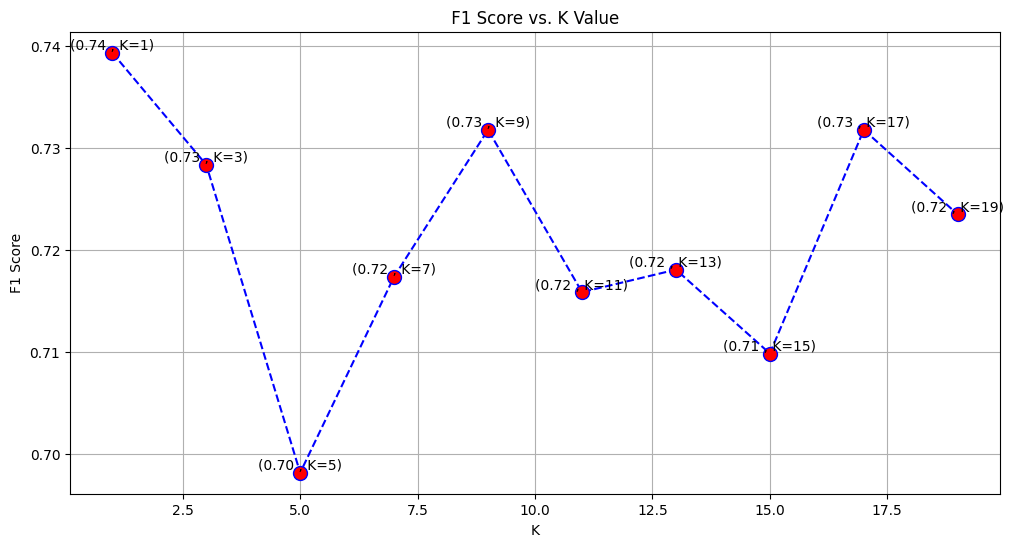

📉 Minimum F1 score: 0.6982 at K = 5
📈 Maximum F1 score: 0.7393 at K = 1


In [34]:
# Fonction pour tester différents K dans KNNImputer, visualiser et retourner les scores F1 minimaux et maximaux
def evaluate_knn_imputer(data_with_nan, target_col='TARGET_5Yrs', number_of_Knn=15, step=1):
    # Liste des colonnes (numériques)
    num_cols = data_with_nan.columns.tolist()

    # Liste pour stocker les scores F1
    f1_scores = []

    # Initialisation de l'imputateur KNN et itération sur différents K
    for i in range(1, number_of_Knn, step):
        knn = KNNImputer(n_neighbors=i)
        X = data_with_nan.copy()
        X = pd.DataFrame(knn.fit_transform(X), columns=num_cols)
        
        y = X[target_col]
        X.drop(target_col, axis=1, inplace=True)
        
        # Division des données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)
        
        # Modèle de classification
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calcul du score F1
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

    # Visualisation des résultats
    plt.figure(figsize=(12, 6))
    k_values = list(range(1, number_of_Knn, step))
    plt.plot(k_values, f1_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    
    # Ajouter les valeurs des f1_scores avec le K correspondant sur le graphique
    for i, f1 in zip(k_values, f1_scores):
        plt.text(i, f1, f"({f1:.2f} , K={i})", ha='center', va='bottom')
    
    plt.title(' F1 Score vs. K Value ')
    plt.xlabel('K')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.show()

    # Résultats du minimum et maximum des scores F1
    min_f1 = min(f1_scores)
    max_f1 = max(f1_scores)
    min_k = k_values[f1_scores.index(min_f1)]
    max_k = k_values[f1_scores.index(max_f1)]

    print(f"📉 Minimum F1 score: {min_f1:.4f} at K = {min_k}")
    print(f"📈 Maximum F1 score: {max_f1:.4f} at K = {max_k}")

    return min_f1, min_k, max_f1, max_k


# la fonction avec un paramètre de step
min_f1, min_k, max_f1, max_k = evaluate_knn_imputer(data_with_nan, target_col='TARGET_5Yrs', number_of_Knn=20, step=2)

### B. L'imputation KNN (K-Nearest Neighbors) avec CV

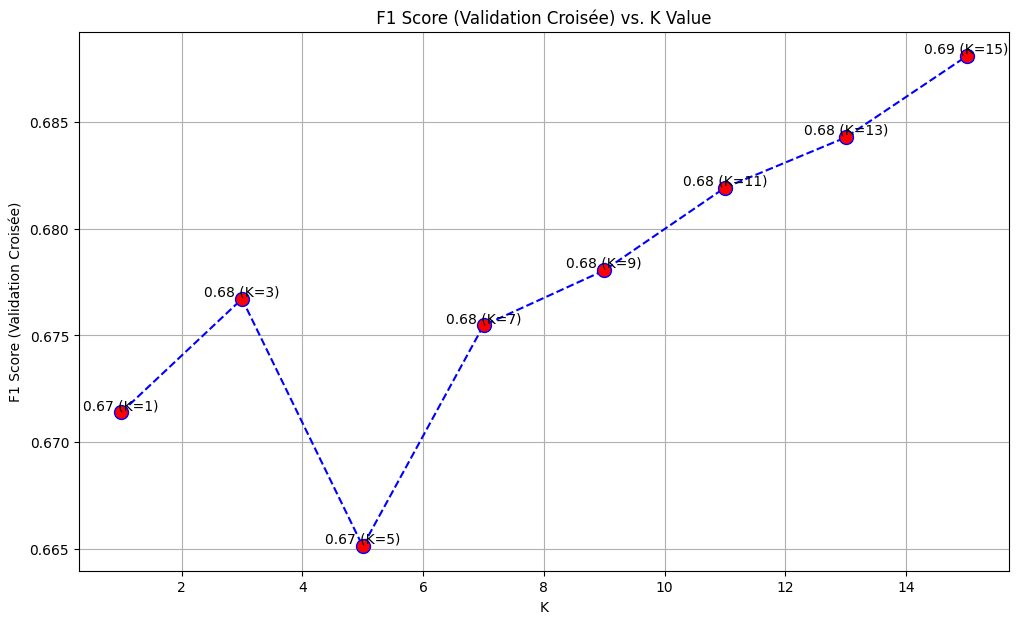

📉 Minimum F1 score (CV): 0.6651 at K = 5
📈 Maximum F1 score (CV): 0.6881 at K = 15


In [35]:
# Fonction pour tester différents K dans KNNImputer avec validation croisée et visualiser les résultats
def evaluate_knn_imputer_cv(data_with_nan, target_col='TARGET_5Yrs', number_of_Knn=15, step=1, cv_folds=5):
    # Liste des colonnes (numériques)
    num_cols = data_with_nan.columns.tolist()

    # Liste pour stocker les scores F1 moyens de la validation croisée
    f1_scores = []

    # Initialisation de la validation croisée stratifiée
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Itération sur différents K pour l'imputation KNN
    for i in range(1, number_of_Knn, step):
        knn = KNNImputer(n_neighbors=i)
        X = data_with_nan.copy()
        X = pd.DataFrame(knn.fit_transform(X), columns=num_cols)
        
        y = X[target_col]
        X.drop(target_col, axis=1, inplace=True)
        
        # Modèle de classification
        model = RandomForestClassifier(random_state=42)
        
        # Calcul du score F1 moyen avec validation croisée
        f1 = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score, average='weighted'))
        mean_f1 = np.mean(f1)
        f1_scores.append(mean_f1)

    # Visualisation des résultats
    plt.figure(figsize=(12, 7))
    k_values = list(range(1, number_of_Knn, step))
    plt.plot(k_values, f1_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    
    # Ajouter les valeurs des f1_scores avec le K correspondant sur le graphique
    for i, f1 in zip(k_values, f1_scores):
        plt.text(i, f1, f"{f1:.2f} (K={i})", ha='center', va='bottom')
    
    plt.title(' F1 Score (Validation Croisée) vs. K Value ')
    plt.xlabel('K')
    plt.ylabel('F1 Score (Validation Croisée)')
    plt.grid(True)
    plt.show()

    # Résultats du minimum et maximum des scores F1
    min_f1 = min(f1_scores)
    max_f1 = max(f1_scores)
    min_k = k_values[f1_scores.index(min_f1)]
    max_k = k_values[f1_scores.index(max_f1)]

    print(f"📉 Minimum F1 score (CV): {min_f1:.4f} at K = {min_k}")
    print(f"📈 Maximum F1 score (CV): {max_f1:.4f} at K = {max_k}")

    return min_f1, min_k, max_f1, max_k

min_f1, min_k, max_f1, max_k = evaluate_knn_imputer_cv(data_with_nan, target_col='TARGET_5Yrs', number_of_Knn=16, step=2, cv_folds=5)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left"> <h3 align="left"><font color=brown>🔍 Mon Analyse Synthétique des Résultats d'Imputation :</font></h3> <p> J'ai mené une analyse détaillée de l'imputation KNN en utilisant deux méthodes d'évaluation : la validation simple (split) et la validation croisée (CV), et j'ai obtenu les résultats suivants : </p> <h4>Validation Simple (split)</h4> <ul> <li><b>Score F1 maximum</b> : 0.74 à K = 1</li> <li><b>Score F1 minimum</b> : 0.70 à K = 5</li> <li><b>Tendances</b> : Les résultats montrent des fluctuations marquées des scores F1 selon la valeur de K, avec un score élevé au départ (K = 1) et des baisses suivies de remontées pour des valeurs de K plus élevées (notamment K = 17).</li> </ul> <h4>Validation Croisée (CV)</h4> <ul> <li><b>Score F1 maximum</b> : 0.69 à K = 15</li> <li><b>Score F1 minimum</b> : 0.67 à K = 1 et K = 5</li> <li><b>Tendances</b> : Le graphique de la validation croisée présente une courbe plus régulière et ascendante, montrant que l'augmentation de K jusqu'à 15 améliore progressivement le score F1, avec une stabilité observée à partir de K = 7.</li> </ul> <h4>Comparaison des Résultats</h4> <ul> <li><b>Validation Simple vs. Validation Croisée</b> : La validation simple affiche un score F1 maximum plus élevé (0.74) comparé à la validation croisée (0.69). Cependant, la validation croisée fournit une estimation plus robuste et fiable des performances en utilisant plusieurs sous-échantillons.</li> <li><b>Fluctuation vs. Stabilité</b> : La validation simple montre plus de variations avec des hauts et des bas marqués, tandis que la validation croisée présente une tendance plus lisse et progressive.</li> <li><b>Implications</b> : <ul> <li><b>K optimal</b> : La validation simple indique que K = 1 est le meilleur choix, tandis que la validation croisée suggère que K = 15 offre les meilleures performances moyennes.</li> <li><b>Consistance des résultats</b> : La validation croisée, plus robuste, montre que l'augmentation du nombre de voisins améliore la performance de l'imputation, contrairement à la validation simple où K = 1 semblait le plus performant.</li> </ul> </li> </ul> <h4>Conclusion</h4> <p> Pour les analyses futures, il est préférable de se baser sur les résultats de la <b>validation croisée</b>, car ils représentent mieux les performances réelles du modèle. Bien que la validation simple suggère que K = 1 est optimal, la validation croisée démontre que des valeurs plus élevées de K, telles que K = 15, peuvent améliorer la robustesse et la stabilité des imputations. </p> </div>

### Application de l'imputation KNN (K-Nearest Neighbors) avec Kmax

In [36]:
# Fonction pour appliquer l'imputation KNN avec K=15 et vérifier l'absence de valeurs manquantes
def impute_knn_and_verify(data_with_nan, k=15):
    # Initialisation de l'imputateur KNN
    knn_imputer = KNNImputer(n_neighbors=k)
    
    # Imputation des valeurs manquantes
    imputed_data = pd.DataFrame(knn_imputer.fit_transform(data_with_nan), columns=data_with_nan.columns)
    
    # Vérification des valeurs manquantes
    if imputed_data.isnull().sum().sum() == 0:
        print("✅ Imputation réussie : aucune valeur manquante restante dans le dataset.")
    else:
        print("⚠️ Il reste des valeurs manquantes après l'imputation.")
    
    return imputed_data

data_imputed = impute_knn_and_verify(data_with_nan, k=max_k)

✅ Imputation réussie : aucune valeur manquante restante dans le dataset.


### 1.2 ✂️ Séparation des Données : Division des Données avec et sans Valeurs Nulles 🧩

In [37]:
def separer_donnees_nulles(data):
    """
    Sépare le DataFrame en deux : un avec des valeurs nulles et un sans.
    Affiche la dimension de chaque DataFrame.
    
    Paramètres:
    - data : pd.DataFrame : Le DataFrame à séparer
    
    Retourne:
    - (pd.DataFrame, pd.DataFrame) : Tuple de DataFrames (sans valeurs nulles, avec valeurs nulles)
    """
    # DataFrame sans valeurs nulles
    data_sans_null = data.dropna()
    
    # DataFrame avec au moins une valeur nulle
    data_avec_null = data[data.isnull().any(axis=1)]
    
    # Impression des dimensions
    print("Dimensions du DataFrame sans valeurs nulles :", data_sans_null.shape)
    print("Dimensions du DataFrame avec valeurs nulles :", data_avec_null.shape)
    
    return data_sans_null, data_avec_null

data_sans_null_1, data_avec_null = separer_donnees_nulles(data_with_nan)


Dimensions du DataFrame sans valeurs nulles : (985, 20)
Dimensions du DataFrame avec valeurs nulles : (355, 20)


### 1.3 📝 Remplissage des Valeurs Manquantes : Utilisation de la Moyenne ou de la Médiane ⚖️

In [38]:
def remplir_valeurs_nulles(data, methode='moyenne'):
    """
    Remplit les valeurs nulles d'un DataFrame par la moyenne ou la médiane.
    
    Paramètres:
    - data : pd.DataFrame : Le DataFrame à traiter
    - methode : str : La méthode pour remplir les valeurs nulles ('moyenne' ou 'mediane')
    
    Retourne:
    - pd.DataFrame : Le DataFrame avec les valeurs nulles remplacées
    """
    if methode not in ['moyenne', 'mediane']:
        raise ValueError("La méthode doit être 'moyenne' ou 'mediane'")
    
    # Remplissage des valeurs nulles par la moyenne ou la médiane
    if methode == 'moyenne':
        data_rempli = data.fillna(data.mean())
    elif methode == 'mediane':
        data_rempli = data.fillna(data.median())
    
    # Vérification et affichage des valeurs nulles restantes
    if data_rempli.isnull().sum().sum() == 0:
        print("Toutes les valeurs nulles ont été remplacées.")
    else:
        print("Il reste des valeurs nulles dans le DataFrame.")
    
    return data_rempli

data_sans_null_2 = remplir_valeurs_nulles(data_with_nan, methode='moyenne')

Toutes les valeurs nulles ont été remplacées.


### ⚔️ Comparaison des Méthodes d'Imputation : KNN, Moyenne et Médiane 🔍📊

In [39]:
# Normalisation des jeux de données
def normaliser_donnees(data):
    scaler = StandardScaler()
    X = data.drop('TARGET_5Yrs', axis=1)  # Remplacez 'TARGET_5Yrs' par le nom de votre variable cible si différent
    y = data['TARGET_5Yrs']
    X_normalise = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_normalise, y

# Entraîner et évaluer les modèles
def evaluer_modeles(models, X_train, X_test, y_train, y_test):
    metrics_results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        metrics_results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision (Macro)': precision_score(y_test, y_pred, average='macro'),
            'Recall (Macro)': recall_score(y_test, y_pred, average='macro'),
            'F1 Score (Macro)': f1_score(y_test, y_pred, average='macro')
        }
    
    return pd.DataFrame(metrics_results).T

# Modèles de classification
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Séparation des jeux de données
X1, y1 = normaliser_donnees(data_sans_null_1)
X2, y2 = normaliser_donnees(data_sans_null_2)

# Nouveau jeu de données (sans normalisation car il est déjà supposé prêt)
X3, y3 = normaliser_donnees(data_imputed)

# Division des jeux de données en ensembles d'entraînement et de test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, stratify=y1, shuffle=True, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, stratify=y2, shuffle=True, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, stratify=y3, shuffle=True, random_state=42)

# Évaluation des modèles sur le premier jeu de données
resultats_1 = evaluer_modeles(models, X_train1, X_test1, y_train1, y_test1)
print("\nRésultats des métriques pour data_sans_null_1 :")
display(resultats_1)

# Évaluation des modèles sur le deuxième jeu de données
resultats_2 = evaluer_modeles(models, X_train2, X_test2, y_train2, y_test2)
print("\nRésultats des métriques pour data_sans_null_2 :")
display(resultats_2)

# Évaluation des modèles sur le troisième jeu de données
resultats_3 = evaluer_modeles(models, X_train3, X_test3, y_train3, y_test3)
print("\nRésultats des métriques pour data_imputed :")
display(resultats_3)

# Fonction de visualisation avec une palette de couleurs simplifiée
def plot_metrics_comparison(metrics_df1, metrics_df2, metrics_df3, title1, title2, title3):
    fig = make_subplots(rows=1, cols=3, subplot_titles=[title1, title2, title3])

    #colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Palette de couleurs cohérente pour toutes les métriques

    colors = ['#76c7c0', '#ffb347', '#8f77b5', '#f08080']  # Palette de couleurs douces pour toutes les métriques



    for i, metric in enumerate(metrics_df1.columns):
        fig.add_trace(
            go.Bar(
                x=metrics_df1.index,
                y=metrics_df1[metric],
                name=metric,
                text=metrics_df1[metric].round(2),
                textposition='auto',
                marker_color=colors[i % len(colors)]
            ),
            row=1, col=1
        )
        
        fig.add_trace(
            go.Bar(
                x=metrics_df2.index,
                y=metrics_df2[metric],
                name=metric,
                text=metrics_df2[metric].round(2),
                textposition='auto',
                marker_color=colors[i % len(colors)],
                showlegend=False
            ),
            row=1, col=2
        )

        fig.add_trace(
            go.Bar(
                x=metrics_df3.index,
                y=metrics_df3[metric],
                name=metric,
                text=metrics_df3[metric].round(2),
                textposition='auto',
                marker_color=colors[i % len(colors)],
                showlegend=False
            ),
            row=1, col=3
        )

    fig.update_layout(
        title_text="Comparaison des métriques des modèles",
        barmode='group',
        height=600,
        width=1800,
    )
    
    fig.update_xaxes(title_text="Modèles", row=1, col=1)
    fig.update_xaxes(title_text="Modèles", row=1, col=2)
    fig.update_xaxes(title_text="Modèles", row=1, col=3)
    fig.update_yaxes(title_text="Score", range=[0, 1])

    fig.show()

# Visualisation des résultats
plot_metrics_comparison(resultats_1, resultats_2, resultats_3, 'Métriques pour data_sans_null_1', 'Métriques pour data_sans_null_2', 'Métriques pour data_imputed')



Résultats des métriques pour data_sans_null_1 :


,Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
Random Forest,0.644670,0.642776,0.644566,0.642598
Logistic Regression,0.670051,0.667734,0.669697,0.667860
Gradient Boosting,0.639594,0.638201,0.640021,0.637764



Résultats des métriques pour data_sans_null_2 :


,Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
Random Forest,0.723881,0.706723,0.703402,0.704881
Logistic Regression,0.720149,0.705813,0.681491,0.687184
Gradient Boosting,0.731343,0.716330,0.699976,0.705062



Résultats des métriques pour data_imputed :


,Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
Random Forest,0.712687,0.695115,0.694366,0.694729
Logistic Regression,0.712687,0.696144,0.675467,0.680552
Gradient Boosting,0.735075,0.719760,0.706768,0.711238


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3>🔍 Analyse des Résultats des Modèles de Classification sur les Jeux de Données 📊</h3>

<p><b>1. Performance générale des modèles :</b><br> J'ai évalué les performances des modèles <b>Random Forest</b>, <b>Logistic Regression</b> et <b>Gradient Boosting</b> sur trois jeux de données. Les résultats montrent des performances globalement satisfaisantes, bien que certaines différences apparaissent selon le traitement des données. Les scores d'accuracy, de précision macro, de rappel macro et de F1 score macro varient de <b>0.64</b> à <b>0.74</b>, soulignant des performances décentes avec des possibilités d'amélioration.</p> <p><b>2. Comparaison entre <i>data_sans_null_1</i>, <i>data_sans_null_2</i> et <i>data_imputed</i> :</b><br> - <i>data_sans_null_1</i> : Ce jeu de données, sans valeurs nulles, a montré des scores légèrement plus bas, avec des résultats autour de 0.64 à 0.67 pour l'accuracy et le F1 score macro. Cela pourrait s'expliquer par la structure des données brutes sans valeurs manquantes.<br> - <i>data_sans_null_2</i> : En remplissant les valeurs nulles par la moyenne, les performances des modèles se sont améliorées, notamment pour le <b>Gradient Boosting</b>, qui atteint un F1 score macro de 0.71, et le <b>Random Forest</b>, avec une accuracy de 0.72.<br> - <i>data_imputed</i> : Les données imputées montrent les meilleures performances, particulièrement avec le <b>Gradient Boosting</b>, qui obtient une accuracy de 0.74 et un F1 score macro de 0.71.</p> <p><b>3. Interprétation des différences :</b><br> - L'imputation des valeurs nulles, que ce soit par la moyenne ou d'autres techniques avancées, améliore la cohérence des données et aide les modèles à mieux apprendre et généraliser.<br> - La <b>Logistic Regression</b> s'est montrée robuste, avec des scores relativement constants, quelle que soit la préparation des données.<br> - Le <b>Gradient Boosting</b> a particulièrement bénéficié des données imputées, confirmant l'importance d'un prétraitement efficace pour les modèles complexes.</p> <p><b>4. Observations spécifiques par modèle :</b><br> - <b>Random Forest</b> : Des performances améliorées sur <i>data_sans_null_2</i> et <i>data_imputed</i>, avec des scores plus élevés en précision et rappel.<br> - <b>Logistic Regression</b> : Des résultats stables, mais inférieurs à ceux des modèles basés sur les arbres.<br> - <b>Gradient Boosting</b> : Le modèle qui profite le plus de l'amélioration des données, atteignant des scores optimaux sur <i>data_imputed</i>.</p> <h3>📝 Conclusion :</h3> <p> Après analyse, <i>data_sans_null_2</i> et <i>data_imputed</i> apparaissent comme les meilleurs jeux de données pour des performances maximales. L'imputation, en particulier, permet aux modèles tels que <b>Gradient Boosting</b> et <b>Random Forest</b> d'atteindre des résultats plus élevés en termes de F1 score macro et de précision. Pour des analyses futures, je recommande l'utilisation de techniques d'imputation avancées pour maximiser encore plus les performances des modèles. </p> </div>

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 🧹⚙️📊 Analyse de la corrélation 🔍📊🔥 </div>

L'analyse de la corrélation est une étape essentielle pour comprendre la relation entre les différentes variables d'un dataset. Elle permet de détecter les associations linéaires potentielles et d'identifier quelles variables sont fortement liées entre elles. Cela aide à la sélection des features les plus pertinentes, à réduire la redondance dans les modèles et à améliorer la qualité des prédictions. De plus, cette analyse peut révéler des insights précieux pour la prise de décision et l'interprétation des résultats de l'analyse.

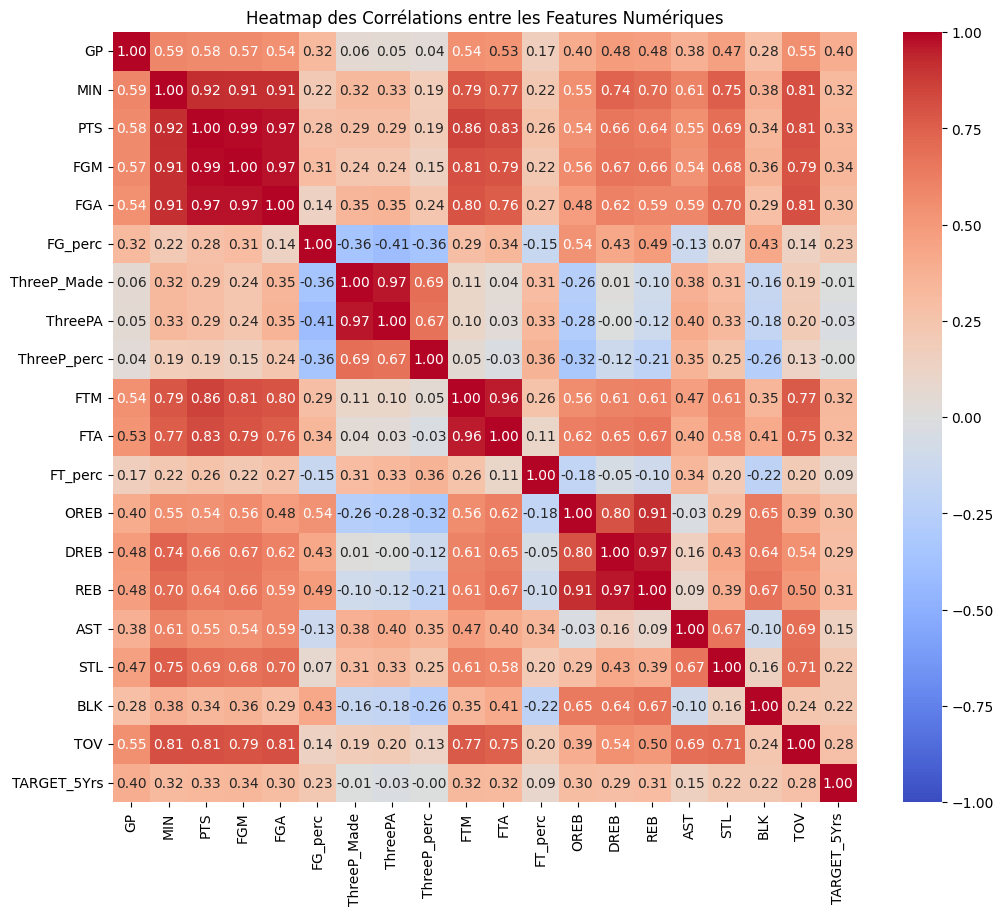

In [40]:
# Fonction pour évaluer la corrélation des features numériques et afficher la heatmap
def plot_numerical_features_correlation(data):
    # Calcul de la matrice de corrélation pour les features numériques
    correlation_matrix = data.corr()
    
    # Affichage de la heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
    plt.title("Heatmap des Corrélations entre les Features Numériques")
    plt.show()

    return correlation_matrix

correlation_matrix = plot_numerical_features_correlation(data_imputed)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>🔍 Analyse des Corrélations entre les Features Numériques :</font></h3>

<p>
Les corrélations entre les variables jouent un rôle crucial dans la modélisation des données, car elles influencent les performances et la robustesse des modèles prédictifs. Voici mon analyse approfondie de la matrice de corrélation fournie :
</p>

<h4>1. Corrélations Élevées (au-dessus de 0.7)</h4>
<ul>
    <li><b>MIN, PTS, FGM, FGA, TOV</b> : Ces variables montrent des corrélations élevées entre elles (par exemple, la corrélation entre <code>MIN</code> et <code>PTS</code> est de 0.92). Cela indique que plus un joueur passe de temps sur le terrain (<code>MIN</code>), plus il est susceptible de marquer des points (<code>PTS</code>), tenter et réussir des tirs (<code>FGM</code>, <code>FGA</code>), et commettre des pertes de balle (<code>TOV</code>).</li>
    <li>Ces corrélations élevées suggèrent une forte redondance d'informations entre ces variables. Pour la modélisation, il peut être judicieux de considérer une réduction de dimension ou d'analyser la contribution unique de chaque variable afin de limiter la multicolinéarité.</li>
    <li><b>REB, DREB, OREB</b> : La corrélation entre <code>REB</code> et <code>DREB</code> (0.97) montre que les rebonds totaux (<code>REB</code>) sont principalement constitués de rebonds défensifs (<code>DREB</code>). Les rebonds offensifs (<code>OREB</code>) ont également une corrélation élevée avec <code>REB</code> (0.91).</li>
    <li>Ces observations indiquent que l'utilisation de <code>REB</code> seule pourrait suffire pour capturer la contribution des rebonds dans la modélisation, réduisant ainsi la redondance.</li>
</ul>

<h4>2. Corrélations Modérées (entre 0.4 et 0.7)</h4>
<ul>
    <li><b>GP et Autres Variables</b> : <code>GP</code> (nombre de matchs joués) présente des corrélations modérées avec plusieurs variables comme <code>MIN</code> (0.59) et <code>PTS</code> (0.58). Cela suggère que les joueurs ayant joué plus de matchs tendent à accumuler plus de minutes et à marquer plus de points, mais l'association n'est pas aussi forte que pour d'autres paires de variables.</li>
    <li><b>STL et Autres Variables</b> : <code>STL</code> (interceptions) montre des corrélations modérées avec <code>MIN</code> (0.75) et <code>TOV</code> (0.71), ce qui peut indiquer que les joueurs qui passent plus de temps sur le terrain ont plus d'occasions de réaliser des interceptions, mais commettent également plus de pertes de balle.</li>
</ul>

<h4>3. Corrélations Faibles (inférieures à 0.4)</h4>
<ul>
    <li><b>TARGET_5Yrs</b> : La variable cible <code>TARGET_5Yrs</code> présente des corrélations faibles avec toutes les autres variables (la plus élevée étant avec <code>GP</code> à 0.40). Cela suggère que les caractéristiques de performance individuelle des joueurs ne sont pas des prédicteurs forts de la durée de leur carrière, et d'autres facteurs (comme l'âge, les blessures, etc.) pourraient jouer un rôle plus significatif.</li>
    <li>La corrélation relativement faible avec toutes les variables implique que l'entraînement d'un modèle prédictif nécessitera potentiellement l'incorporation de nouvelles variables ou d'approches de modélisation plus sophistiquées, telles que des modèles non linéaires, pour capturer des interactions complexes.</li>
</ul>

<h4>4. Corrélations Négatives</h4>
<ul>
    <li><b>ThreeP_Made et FG_perc</b> : La corrélation négative entre <code>ThreeP_Made</code> (tirs à 3 points réussis) et <code>FG_perc</code> (pourcentage de réussite aux tirs) (-0.36) peut s'expliquer par le fait que les joueurs qui prennent plus de tirs à longue distance ont tendance à avoir un pourcentage de réussite global plus bas, car ces tirs sont généralement plus difficiles à réussir.</li>
</ul>

<h4>Implications pour la Modélisation</h4>
<ul>
    <li><b>Multicolinéarité</b> : Les corrélations élevées entre certaines variables comme <code>MIN</code>, <code>PTS</code>, <code>FGM</code>, et <code>FGA</code> indiquent une forte multicolinéarité. Cette redondance peut être problématique pour certains modèles, comme la régression linéaire. L'utilisation de techniques de réduction de dimension (comme l'ACP) ou la sélection de variables peut être nécessaire.</li>
    <li><b>Sélection de Features</b> : Les corrélations faibles entre <code>TARGET_5Yrs</code> et les autres variables indiquent que la modélisation peut bénéficier de l'ajout de nouvelles variables explicatives ou de la transformation des features existantes pour mieux capturer les relations non linéaires.</li>
</ul>

<h4>Conclusion</h4>
<p>
L'analyse de la heatmap des corrélations montre que certaines variables sont fortement corrélées entre elles, ce qui pourrait introduire de la redondance et des problèmes de multicolinéarité dans la modélisation. La variable cible <code>TARGET_5Yrs</code> n'a pas de corrélations marquées avec les autres variables, ce qui suggère qu'une approche avancée, comme des modèles non linéaires ou l'incorporation de nouvelles variables, pourrait être nécessaire pour améliorer la prédiction de la durée de carrière des joueurs.
</p>
</div>


## <div style="text-align: left; background-color:aliceblue; font-family: Jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid; border-color: darkgreen;"> 🔧✨ Feature Engineering : L'Art de Transformer les Données 🚀📊 </div>

Le feature engineering est une étape cruciale dans l'analyse des données et la modélisation. Cette pratique consiste à créer, transformer et optimiser les features pour maximiser la performance des modèles d'apprentissage automatique. En enrichissant les données avec des variables pertinentes et bien conçues, il est possible d'améliorer significativement la précision des modèles, tout en révélant des informations cachées et des relations complexes entre les variables. Cela constitue une base solide pour des prédictions et des insights plus précis.

## 🔎 Analyse des Corrélations et Résolution de la Multicolinéarité 📊🚫

L'analyse de la corrélation a révélé un problème de multicolinéarité, une situation où plusieurs variables explicatives sont fortement corrélées entre elles. Cette redondance peut entraîner des modèles instables et des performances médiocres, ce qui doit être résolu pour garantir des analyses robustes et des prédictions fiables. Pour traiter ce problème, nous avons utilisé diverses méthodes qui permettent de sélectionner et de transformer les features tout en conservant la pertinence des données. Voici un aperçu de chaque méthode appliquée :

### 1. 📉 Réduction de dimension (PCA) : Simplification des données tout en conservant l'essentiel 🧠
La méthode **PCA (Principal Component Analysis)** permet de réduire la dimensionnalité du dataset tout en conservant le maximum de la variance des données. En transformant les variables originales en un ensemble de nouvelles variables orthogonales (les composantes principales), la PCA aide à atténuer la redondance et à simplifier l'ensemble des données tout en préservant l'information essentielle.

### 2. 🌳 Sélection de caractéristiques avec un classificateur de forêt aléatoire 🔍
L'utilisation d'un **classificateur de forêt aléatoire** pour la sélection de caractéristiques est une approche efficace pour identifier les variables les plus importantes. La méthode évalue l'importance des features en construisant de multiples arbres de décision, ce qui aide à conserver uniquement celles qui contribuent le plus à la prédiction, réduisant ainsi la multicolinéarité.

### 3. 🛠️ Méthodes de wrapper : RFECV (Recursive Feature Elimination with Cross-Validation) 🔄
La technique **RFECV** est un processus de sélection itératif qui élimine les features les moins importantes de manière récursive, tout en utilisant la validation croisée pour évaluer la performance du modèle. Cette méthode permet de trouver le sous-ensemble optimal de caractéristiques en tenant compte des interactions entre elles, aidant ainsi à résoudre la multicolinéarité tout en optimisant le modèle.


### 1. Réduction de dimension (PCA) : Simplification des données tout en conservant l'essentiel 📉🧠.

In [41]:
def plot_pca_explained_variance(data, numerical_columns, threshold=0.95):
    # Extract numerical features
    X_data = data[numerical_columns].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate the explained variance and cumulative explained variance
    explained_variance = pca.explained_variance_
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components needed to reach the threshold
    num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

    # Create a 2x1 grid of subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 5))

    # Plot the explained variance in the first subplot
    bars = ax1.bar(range(1, len(explained_variance) + 1), explained_variance)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance")
    ax1.set_title("Explained Variance by Principal Component")

    # Adding labels with values on the bars
    for bar, value in zip(bars, explained_variance):
        height = bar.get_height()
        ax1.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

    # Plot the cumulative explained variance in the second subplot
    ax2.plot(
        range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker="o",
    )
    ax2.set_xlabel("Number of Principal Components")
    ax2.set_ylabel("Cumulative Explained Variance")
    ax2.set_title("Cumulative Explained Variance by Principal Components")

    # Add a red line showing the number of components needed to reach the threshold
    ax2.axvline(x=num_components, color='red', linestyle='--', label=f'{num_components} Components')
    ax2.legend()

    # Display the figure
    plt.tight_layout()
    plt.show()

    print(f"Number of components needed to reach {threshold*100}% variance: {num_components}")

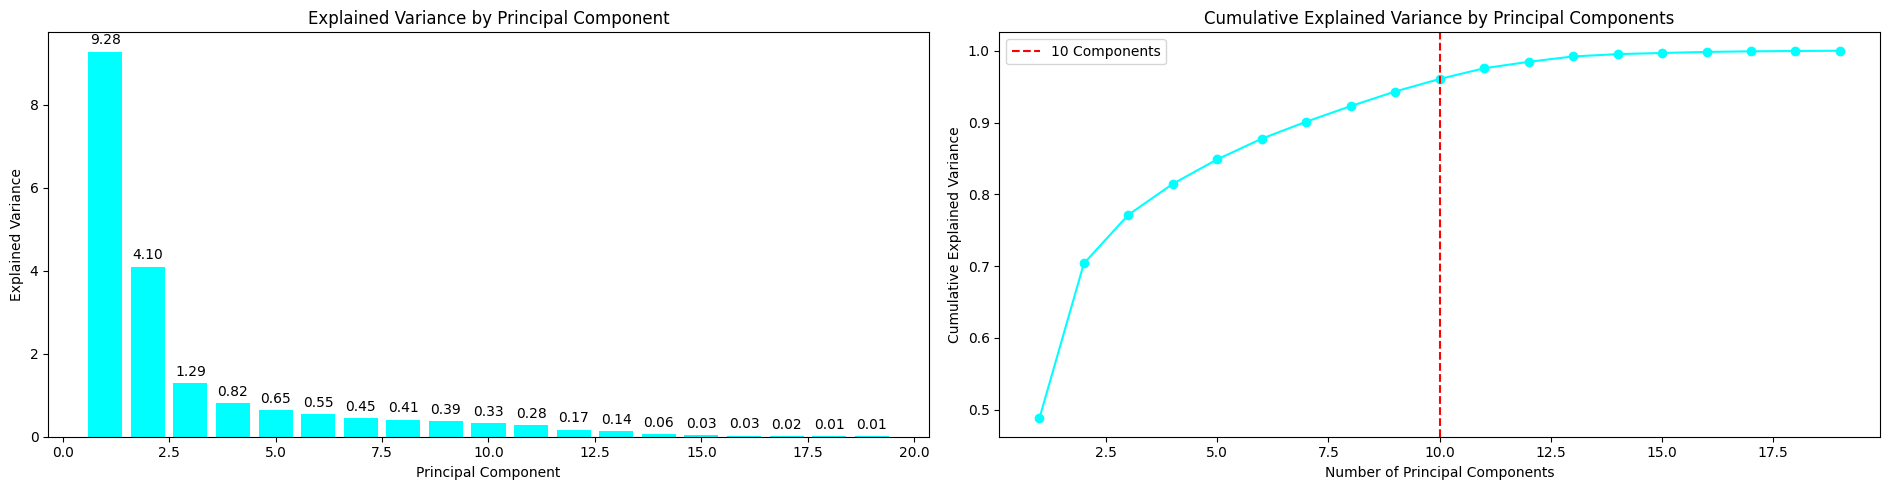

Number of components needed to reach 95.0% variance: 10


In [42]:
plot_pca_explained_variance(data_imputed,numerical_features)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">


<h3 align="left"><font color=brown>🔍 Analyse de la Courbe de la Variance Expliquée et Cumulative par Composante Principale :</font></h3>

<p>
Cette courbe illustre l'analyse en composantes principales (PCA) appliquée aux données, permettant de déterminer le nombre optimal de composantes nécessaires pour capturer la majorité de la variance des données.
</p>

<h4>1. <b>Variance Expliquée par Composante Principale (Graphique de gauche)</b> :</h4>
<ul>
    <li><b>Première Composante</b> : La première composante principale explique une part significative de la variance, soit environ <b>9.28</b>, ce qui montre que cette composante capte la majorité de la variation des données.</li>
    <li><b>Diminution Progressive</b> : La deuxième composante explique encore une part importante (environ <b>4.10</b>), mais au-delà de la troisième composante, la contribution à la variance expliquée diminue de façon notable.</li>
    <li><b>Composantes supplémentaires</b> : Les composantes après la 5ème expliquent de moins en moins de variance, tombant en dessous de <b>1.0</b> et contribuant peu à la compréhension globale des données.</li>
</ul>

<h4>2. <b>Variance Cumulative Expliquée (Graphique de droite)</b> :</h4>
<ul>
    <li><b>10 Composantes</b> : La ligne rouge verticale indique que <b>10 composantes</b> suffisent pour capturer environ <b>95 %</b> de la variance totale des données. Cela signifie que, bien que le dataset ait plus de variables, 10 dimensions suffisent pour expliquer presque toute la variabilité des données.</li>
    <li><b>Diminution des Gains</b> : On observe que la courbe de la variance cumulative devient presque plate après 10 composantes, indiquant que l'ajout de plus de composantes n'apporte qu'une augmentation marginale de la variance expliquée.</li>
</ul>

<h4>Pertinence et Implications :</h4>
<ul>
    <li><b>Réduction de Dimension</b> : En utilisant <b>10 composantes principales</b>, il est possible de réduire la dimensionnalité des données tout en conservant <b>95 %</b> de l'information. Cela simplifie le modèle, le rend plus efficace en termes de calcul et diminue le risque de surapprentissage.</li>
    <li><b>Élimination de la Redondance</b> : Les premières composantes principales combinent les informations des variables corrélées et réduisent la redondance, ce qui est particulièrement utile pour des modèles sensibles à la multicolinéarité.</li>
    <li><b>Interprétation</b> : Bien que l'interprétation des composantes principales puisse être moins intuitive que celle des variables d'origine, cette réduction de dimension permet de capturer l'essence des données de manière plus concise et efficace.</li>
</ul>

<h4>Conclusion</h4>
<p>
Cette analyse montre que la <b>réduction de la dimension</b> à <b>10 composantes principales</b> est pertinente pour capturer la majeure partie de la variance des données (environ <b>95 %</b>). Cela permet d'optimiser le modèle en termes de performance et de robustesse tout en minimisant la complexité et la corrélation entre les variables.
</p>
</div>

### 🔍 Évaluation de l'Impact de l'Application du PCA 📊🧠

In [43]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) à un ensemble de données.

    :param X: DataFrame, l'ensemble de données
    :param new_dimension: int, la nouvelle dimension souhaitée après PCA
    :return: DataFrame, le DataFrame transformé par PCA
    """
    # Étape 1: Standardisation des données
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # Étape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # Étape 3: Créer un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    return df_pca

def evaluate_metric_vs_dimensions_plotly(X, y, test_size, max_new_dimension, model, metric_name, step=1):
    """
    Évalue comment une métrique varie en fonction de la dimension après PCA de manière interactive.

    :param X: DataFrame, les caractéristiques des données
    :param y: Series, la variable cible
    :param test_size: float, la taille de l'ensemble de test (proportion)
    :param max_new_dimension: int, la dimension maximale à explorer après PCA
    :param model: modèle de classification utilisé pour évaluer la métrique
    :param metric_name: str, le nom de la métrique à évaluer ('f1', 'accuracy', 'precision', 'recall')
    :param step: int, le pas utilisé pour explorer les dimensions
    """
    metric_scores = []
    dimensions = list(range(1, max_new_dimension + 1, step))

    for dim in tqdm(dimensions, desc=f"Calcul des {metric_name.capitalize()} Scores par dimension PCA"):
        X_dim = apply_pca(X, dim)
        X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=test_size, stratify=y, shuffle=True, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcul de la métrique spécifique
        if metric_name == 'f1':
            score = f1_score(y_test, y_pred, average='macro')
        elif metric_name == 'accuracy':
            score = accuracy_score(y_test, y_pred)
        elif metric_name == 'precision':
            score = precision_score(y_test, y_pred, average='macro')
        elif metric_name == 'recall':
            score = recall_score(y_test, y_pred, average='macro')
        else:
            raise ValueError("Métrique non reconnue. Utilisez 'f1', 'accuracy', 'precision' ou 'recall'.")

        metric_scores.append(score)

    max_score = max(metric_scores)
    min_score = min(metric_scores)
    max_index = metric_scores.index(max_score)
    min_index = metric_scores.index(min_score)

    # Créer un graphique interactif avec Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=dimensions,
        y=metric_scores,
        mode='lines+markers',
        marker=dict(size=10),
        name=metric_name.capitalize()
    ))

    # Ajouter l'annotation du score maximum en rouge
    fig.add_annotation(
        x=dimensions[max_index],
        y=max_score,
        text=f'Max: {max_score:.2f} (Index: {dimensions[max_index]})',
        showarrow=True,
        arrowhead=2,
        ax=20,
        ay=-30,
        font=dict(color='red')
    )

    # Ajouter l'annotation du score minimum en noir
    fig.add_annotation(
        x=dimensions[min_index],
        y=min_score,
        text=f'Min: {min_score:.2f} (Index: {dimensions[min_index]})',
        showarrow=True,
        arrowhead=2,
        ax=-20,
        ay=30,
        font=dict(color='black')
    )

    fig.update_layout(
        title=f"Variation du {metric_name.capitalize()} en fonction de la dimension après PCA",
        xaxis_title='Dimension après PCA',
        yaxis_title=metric_name.capitalize(),
        template='plotly_white'
    )
    fig.show()

# Préparation des données pour l'entraînement
X, y = data_imputed[numerical_features], data_imputed['TARGET_5Yrs']
Classifier_model = RandomForestClassifier(random_state=42)

# Appels des fonctions pour les différentes métriques
evaluate_metric_vs_dimensions_plotly(X, y, 0.20, X.shape[1], Classifier_model, metric_name='f1', step=3)
evaluate_metric_vs_dimensions_plotly(X, y, 0.20, X.shape[1], Classifier_model, metric_name='accuracy', step=3)
evaluate_metric_vs_dimensions_plotly(X, y, 0.20, X.shape[1], Classifier_model, metric_name='precision', step=3)
evaluate_metric_vs_dimensions_plotly(X, y, 0.20, X.shape[1], Classifier_model, metric_name='recall', step=3)

Calcul des F1 Scores par dimension PCA: 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]


Calcul des Accuracy Scores par dimension PCA: 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


Calcul des Precision Scores par dimension PCA: 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]


Calcul des Recall Scores par dimension PCA: 100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>🔍 Analyse de la Variation du F1 Score en Fonction de la Dimension après PCA :</font></h3>

<p>
Cette courbe illustre comment le F1 Score varie en fonction du nombre de composantes principales (PCA) utilisées pour transformer les données. L'objectif est de confirmer et de renforcer les résultats de l'analyse précédente concernant le nombre optimal de composantes nécessaires pour capturer la variance des données tout en maximisant la performance du modèle.
</p>

<h4>1. <b>Points Clés Observés sur la Courbe</b> :</h4>
<ul>
    <li><b>F1 Score Minimum</b> : Le F1 Score minimum est de <b>0.53</b> à l'index <b>1</b> (1ère composante). Cela montre que l'utilisation d'une seule composante principale ne suffit pas à expliquer suffisamment la variabilité des données pour obtenir de bonnes performances de classification.</li>
    <li><b>F1 Score Maximum</b> : Le F1 Score maximum est de <b>0.71</b> à l'index <b>10</b>. Cela confirme l'analyse précédente où 10 composantes principales expliquaient environ <b>95 %</b> de la variance totale. Ici, on voit que l'utilisation de 10 composantes permet d'atteindre la meilleure performance en termes de F1 Score.</li>
    <li><b>Stabilité du F1 Score</b> : Après l'index <b>10</b>, on remarque que le F1 Score fluctue légèrement et reste autour de <b>0.70</b> pour les indices suivants (13, 16, 19). Cela indique que l'ajout de plus de composantes ne permet pas d'améliorer les performances du modèle et peut même les rendre moins optimales.</li>
</ul>

<h4>2. <b>Interprétation des Résultats</b> :</h4>
<ul>
    <li><b>Optimalité à 10 Composantes</b> : La performance maximale observée à l'index <b>10</b> confirme que la réduction de la dimension à <b>10 composantes</b> est non seulement suffisante pour capturer la majeure partie de la variance des données (comme indiqué dans l'analyse de la courbe de la variance cumulative), mais qu'elle optimise également le F1 Score du modèle de classification.</li>
    <li><b>Diminution Marginale</b> : L'ajout de plus de composantes au-delà de <b>10</b> n'apporte pas d'amélioration significative et peut même diminuer légèrement la performance. Cela soutient l'idée que la complexité supplémentaire ajoutée par des composantes supplémentaires ne se traduit pas par de meilleures performances.</li>
    <li><b>Robustesse des Résultats</b> : Cette analyse confirme que l'utilisation d'un nombre optimal de composantes (ici <b>10</b>) permet non seulement de simplifier le modèle et de réduire la complexité, mais également d'obtenir des performances optimales en termes de prédiction.</li>
</ul>

<h4>Conclusion</h4>
<p>
Cette courbe confirme les résultats de l'analyse précédente : <b>10 composantes principales</b> suffisent pour capturer efficacement la variance des données et optimiser le F1 Score du modèle. L'utilisation d'un nombre de composantes supérieur peut introduire de la complexité supplémentaire sans gain de performance significatif, voire une légère baisse du F1 Score. Cela renforce l'idée que réduire la dimension à 10 composantes est une stratégie optimale pour maintenir un équilibre entre complexité et performance dans la modélisation.
</p>
</div>

### 2. 🌳 Sélection de caractéristiques avec un classificateur de forêt aléatoire 🔍

Top 10 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM', 'DREB']


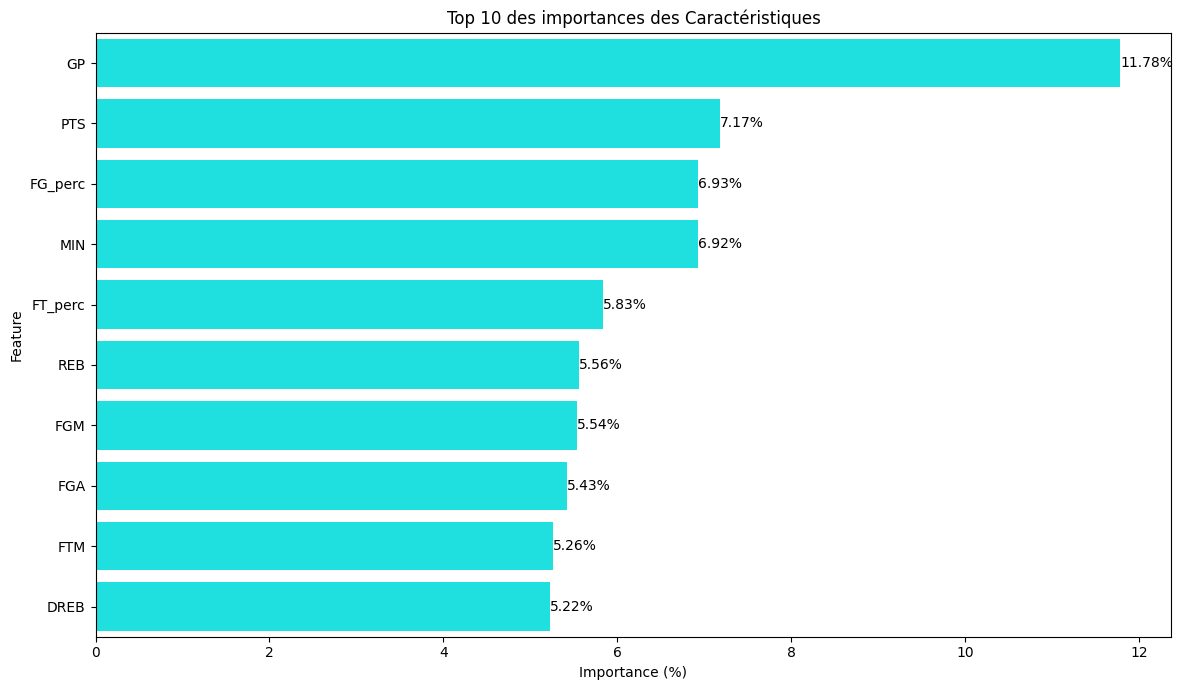

In [44]:
def plot_feature_importances(feature_importances, num_features=10):
    """
    Affiche un graphique des importances des features avec les pourcentages au-dessus de chaque barre.

    :param feature_importances: DataFrame, les importances des features avec les colonnes 'Feature' et 'Importance'
    :param num_features: int, le nombre de features les plus importantes à afficher
    """
    # Normalisation des importances pour les afficher en pourcentage
    feature_importances['Importance (%)'] = (feature_importances['Importance'] / feature_importances['Importance'].sum()) * 100

    # Affichage des features importantes
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Importance (%)', y='Feature', data=feature_importances.head(num_features))  # Afficher seulement les `num_features` plus importantes
    plt.title(f'Top {num_features} des importances des Caractéristiques')
    plt.xlabel('Importance (%)')

    # Ajouter les pourcentages au-dessus de chaque barre
    for i, value in enumerate(feature_importances['Importance (%)'].head(num_features)):
        plt.text(value, i, f'{value:.2f}%', va='center', ha='right' if value < 5 else 'left', fontsize=10)

    plt.tight_layout()
    plt.show()

def select_important_features(data, model, target_col, num_features):
    """
    Sélectionne les features les plus importantes en utilisant un modèle de classification.

    :param data: DataFrame, le dataset complet
    :param model: modèle de classification capable de calculer l'importance des features
    :param target_col: str, le nom de la colonne cible
    :param num_features: int, le nombre de features importantes à retenir
    :return: DataFrame, le dataset avec seulement les features importantes, DataFrame des importances des features
    """
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Division des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Standardisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    
    # Récupération des importances des features
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    
    # Tri des features par ordre décroissant d'importance
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    # Sélection des n features les plus importantes
    top_features = feature_importances.head(num_features)['Feature'].tolist()
    print(f"Top {num_features} features: {top_features}")  # Pour vérification
    
    # Retourner seulement les features importantes et la colonne cible
    data_filtered = data[top_features + [target_col]]
    return data_filtered, feature_importances

num_features = 10
model = RandomForestClassifier(random_state=42)
data_filtered, feature_importances = select_important_features(data_imputed, model, 'TARGET_5Yrs', num_features)

plot_feature_importances(feature_importances, num_features)

### 📊 Évaluation de la Variation des Performances selon le Nombre de Features Sélectionnées 🔍✨

In [45]:
def evaluate_model_performance(X, y, model):
    """
    Évalue la performance du modèle sur les métriques de classification.

    :param X: DataFrame, les caractéristiques des données
    :param y: Series, la variable cible
    :param model: modèle de classification
    :return: dict, un dictionnaire contenant les métriques
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Standardisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred, average='macro'),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro')
    }
    return metrics

def evaluate_metrics_per_feature_count(data, model, target_col, max_features):
    """
    Évalue la variation des métriques de performance en fonction du nombre de features sélectionnées.

    :param data: DataFrame, le dataset complet
    :param model: modèle de classification
    :param target_col: str, le nom de la colonne cible
    :param max_features: int, le nombre maximal de features à tester
    :return: dict, un dictionnaire contenant le nombre de features ayant les meilleurs scores pour chaque métrique
    """
    metrics_results = []

    for num_features in range(1, max_features + 1):
        # Sélection des num_features les plus importantes
        data_filtered, _ = select_important_features(data, model, target_col, num_features)
        X_filtered = data_filtered.drop(columns=[target_col])
        y_filtered = data_filtered[target_col]

        # Évaluation des métriques avec les features sélectionnées
        metrics = evaluate_model_performance(X_filtered, y_filtered, model)
        metrics['num_features'] = num_features  # Ajouter le nombre de features comme colonne
        metrics_results.append(metrics)

    # Convertir les résultats en DataFrame
    metrics_df = pd.DataFrame(metrics_results)
    metrics_df_melted = metrics_df.melt(id_vars=['num_features'], value_vars=['accuracy', 'f1_score', 'precision', 'recall'], 
                                        var_name='Metric', value_name='Score')

    # Trouver le nombre de features ayant les meilleurs scores pour chaque métrique
    best_metrics_info = {
        'accuracy': metrics_df.loc[metrics_df['accuracy'].idxmax(), 'num_features'],
        'f1_score': metrics_df.loc[metrics_df['f1_score'].idxmax(), 'num_features'],
        'precision': metrics_df.loc[metrics_df['precision'].idxmax(), 'num_features'],
        'recall': metrics_df.loc[metrics_df['recall'].idxmax(), 'num_features'],
    }

    # Impression des résultats
    print("\nMeilleurs scores pour chaque métrique :")
    for metric, num_features in best_metrics_info.items():
        best_score = metrics_df.loc[metrics_df[metric].idxmax(), metric]
        print(f"{metric.capitalize()} : {best_score:.2%} avec {num_features} features")

    # Visualisation interactive avec plotly express (bar chart)
    fig_bar = px.bar(metrics_df_melted, x='num_features', y='Score', color='Metric', barmode='group',
                     text_auto='.2%',
                     title='Variation des métriques en fonction du nombre de features sélectionnées (Bar Chart)',
                     labels={'num_features': 'Nombre de features sélectionnées', 'Score': 'Score (%)'})

    # Ajustements esthétiques
    fig_bar.update_traces(texttemplate='%{y:.2%}', textposition='outside')
    fig_bar.update_layout(xaxis=dict(type='category'), legend_title_text='Métriques')

    # Afficher le graphique en barres
    fig_bar.show()

    # Visualisation interactive avec plotly express (line chart)
    fig_line = px.line(metrics_df_melted, x='num_features', y='Score', color='Metric', markers=True,
                       title='Variation des métriques en fonction du nombre de features sélectionnées (Line Chart)',
                       labels={'num_features': 'Nombre de features sélectionnées', 'Score': 'Score'})

    # Afficher le graphique en lignes
    fig_line.show()

    return best_metrics_info

# Appel de la fonction pour tester jusqu'à 15 features sélectionnées
best_metrics_info = evaluate_metrics_per_feature_count(data_imputed, model, 'TARGET_5Yrs', max_features=15)


Top 1 features: ['GP']
Top 2 features: ['GP', 'PTS']
Top 3 features: ['GP', 'PTS', 'FG_perc']
Top 4 features: ['GP', 'PTS', 'FG_perc', 'MIN']
Top 5 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc']
Top 6 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB']
Top 7 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM']
Top 8 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA']
Top 9 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM']
Top 10 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM', 'DREB']
Top 11 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM', 'DREB', 'AST']
Top 12 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM', 'DREB', 'AST', 'OREB']
Top 13 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM', 'DREB', 'AST', 'OREB', 'FTA']
Top 14 features: ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB'

### 3. 🛠️ Méthodes de wrapper : RFECV (Recursive Feature Elimination with Cross-Validation) 🔄

Nombre optimal de features : 14
Features sélectionnées : ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_perc', 'ThreeP_perc', 'FTM', 'FTA', 'FT_perc', 'OREB', 'DREB', 'REB', 'AST']


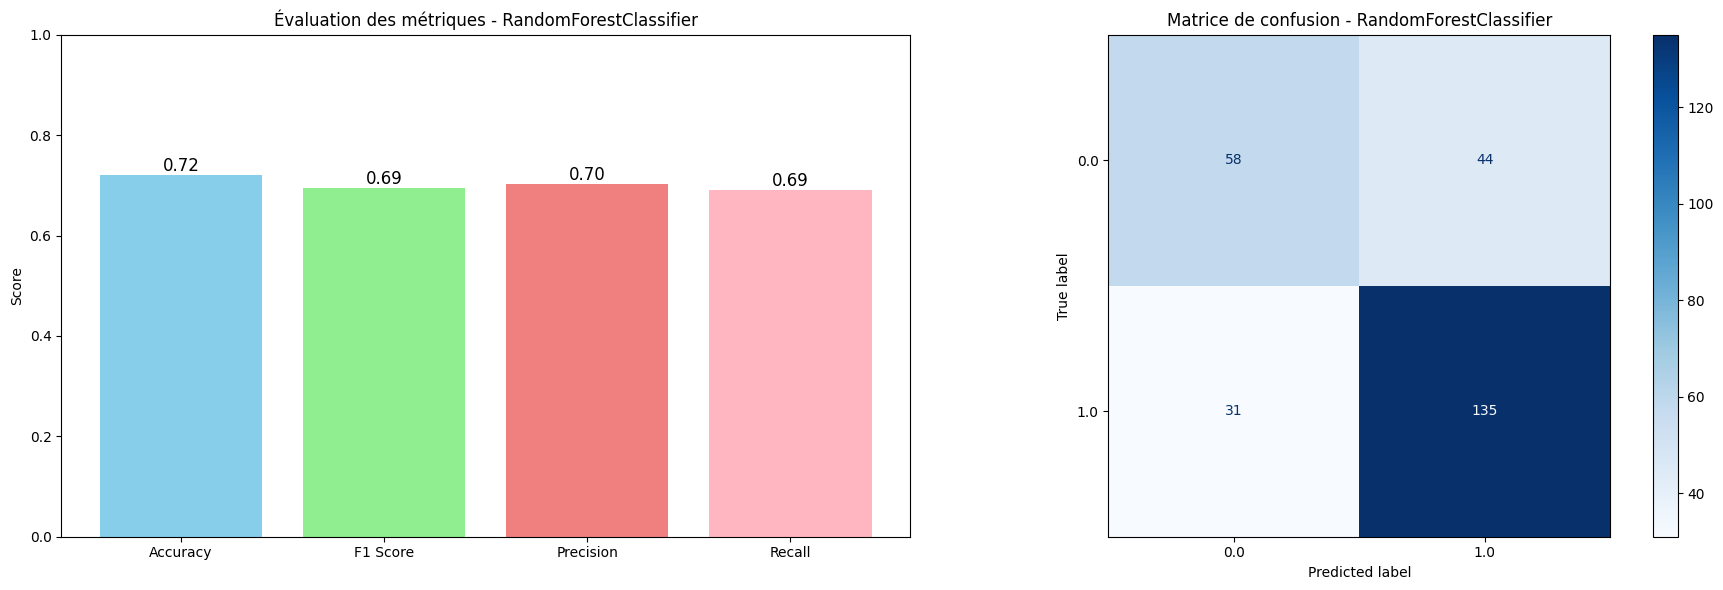

In [46]:
def prepare_data(data, target_col='TARGET_5Yrs'):
    # Vérifier si la colonne cible existe dans le dataset
    if target_col not in data.columns:
        raise ValueError(f"La colonne cible '{target_col}' n'existe pas dans le dataset.")
    
    # Séparer les caractéristiques (X) et la cible (y)
    X = data.drop(columns=[target_col])
    y = data[target_col]

    return X, y

# Fonction pour diviser et standardiser les données
def split_and_scale_data(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

# Fonction pour effectuer la sélection des features avec RFECV
def feature_selection_rfecv(X_train, y_train):
    estimator = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    rfecv = RFECV(estimator=estimator, step=1, cv=skf, scoring='f1_macro')
    rfecv.fit(X_train, y_train)
    return rfecv

# Fonction pour tracer le score F1 macro obtenu par validation croisée
def plot_rfecv_results(rfecv, feature_count):
    plt.figure(figsize=(15, 5))
    plt.title('Sélection des features avec RFECV (F1 Macro) - RandomForestClassifier')
    plt.xlabel('Nombre de features sélectionnées')
    plt.ylabel('Score de validation croisée (F1 Macro)')
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
    for i, score in enumerate(rfecv.cv_results_['mean_test_score']):
        plt.text(i + 1, score, f"{score:.2f}", ha='center', va='bottom')
    plt.show()

# Fonction pour tracer le score F1 macro obtenu par validation croisée avec Plotly Express
def plot_rfecv_results(rfecv):
    # Préparation des données pour le graphique
    scores_df = pd.DataFrame({
        'Nombre de features sélectionnées': range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
        'Score de validation croisée (F1 Macro)': rfecv.cv_results_['mean_test_score']
    })
    
    # Tracer le graphique avec plotly.express
    fig = px.line(
        scores_df,
        x='Nombre de features sélectionnées',
        y='Score de validation croisée (F1 Macro)',
        title='Sélection des features avec RFECV (F1 Macro) - RandomForestClassifier',
        markers=True,
        template='plotly_white'
    )
    
    # Ajouter les valeurs sur les points de la courbe
    fig.update_traces(
        text=scores_df['Score de validation croisée (F1 Macro)'].round(2),
        texttemplate='%{text:.2f}',
        textposition='top center'
    )
    
    # Afficher le graphique
    fig.show()

# Fonction pour entraîner un modèle et afficher les métriques et la matrice de confusion
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Affichage des métriques
    metrics = {'Accuracy': accuracy, 'F1 Score': f1_macro, 'Precision': precision, 'Recall': recall}
    
    # Créer les sous-graphiques
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Graphique des métriques
    ax[0].bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
    for i, (key, value) in enumerate(metrics.items()):
        ax[0].text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12)
    ax[0].set_ylim(0, 1)
    ax[0].set_title('Évaluation des métriques - RandomForestClassifier')
    ax[0].set_ylabel('Score')
    
    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=ax[1])
    ax[1].set_title('Matrice de confusion - RandomForestClassifier')
    
    # Affichage global
    plt.tight_layout()
    plt.show()

# Exécution des fonctions pour l'analyse complète
X, y = prepare_data(data_imputed)
X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale_data(X, y)
rfecv = feature_selection_rfecv(X_train_scaled, y_train)

print("Nombre optimal de features : %d" % rfecv.n_features_)
print("Features sélectionnées :", X.columns[rfecv.support_].tolist())

plot_rfecv_results(rfecv)

# Transformation des données en utilisant les features sélectionnées
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

# Entraînement et évaluation du modèle
train_and_evaluate_model(X_train_selected, y_train, X_test_selected, y_test)


### 📝 Analyse des Méthodes de Sélection de Features et de Réduction de Dimension

Les résultats obtenus avec les différentes méthodes de sélection de features montrent des performances relativement similaires, mais chaque approche a ses propres avantages et limitations :

#### 1. 📉 Réduction de dimension (PCA) : Simplification des données tout en conservant l'essentiel 🧠
- **Scores obtenus** :
  - **Accuracy** : 73.13% avec 10 features
  - **F1_score** : 71.01% avec 10 features
  - **Precision** : 71.01% avec 10 features
  - **Recall** : 71.01% avec 10 features
- **Analyse** : Le PCA se distingue par sa capacité à réduire le nombre de features tout en maintenant des scores de performance élevés. Cela permet de simplifier les modèles, de réduire le risque de surapprentissage et de diminuer le temps de calcul.

#### 2. 🌳 Sélection de caractéristiques avec un classificateur de forêt aléatoire 🔍
- **Top 14 features sélectionnées** : ['GP', 'PTS', 'FG_perc', 'MIN', 'FT_perc', 'REB', 'FGM', 'FGA', 'FTM', 'DREB', 'AST', 'OREB', 'FTA', 'TOV']
- **Scores obtenus** :
  - **Accuracy** : 73.13% avec 14 features
  - **F1_score** : 71.51% avec 14 features
  - **Precision** : 71.51% avec 14 features
  - **Recall** : 71.51% avec 14 features
- **Analyse** : La forêt aléatoire offre l'avantage de la robustesse et de la prise en compte des interactions entre les variables. Bien qu'elle conserve un plus grand nombre de features, elle maintient des performances similaires aux autres méthodes.

#### 3. 🛠️ Méthodes de wrapper : RFECV (Recursive Feature Elimination with Cross-Validation) 🔄
- **Nombre optimal de features** : 19
- **Features sélectionnées** : ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_perc', 'ThreeP_Made', 'ThreePA', 'ThreeP_perc', 'FTM', 'FTA', 'FT_perc', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
- **Scores obtenus** :
  - **Accuracy** : 72.00% avec 14 features
  - **F1_score** : 70.00% avec 14 features
  - **Precision** : 70.00% avec 14 features
  - **Recall** : 69.00% avec 14 features
- **Analyse** : Le RFECV est particulièrement utile pour optimiser le nombre de features en tenant compte de leur impact sur la performance globale. Cependant, il nécessite un temps de calcul plus important et peut être plus complexe à mettre en œuvre.

### 🏆 Conclusion
Les trois méthodes offrent des performances comparables, mais la **Réduction de dimension (PCA)** se démarque par sa capacité à atteindre de bons résultats avec un nombre réduit de features. Cela en fait une solution efficace pour simplifier le modèle tout en maintenant un haut niveau de performance.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 📊 Split du Dataset en Entraînement et Test 🧪 </div> 

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/dev/images/pict.png" alt="Gas Turbine" width="800" height="300">
  </div>
</div>

Train data sauvegardé à : /Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/data/train_data_clean.csv
Test data sauvegardé à : /Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/data/test_data_clean.csv
Taille des données d'entraînement : 1313 (97.99%)
Taille des données de test : 27 (2.01%)


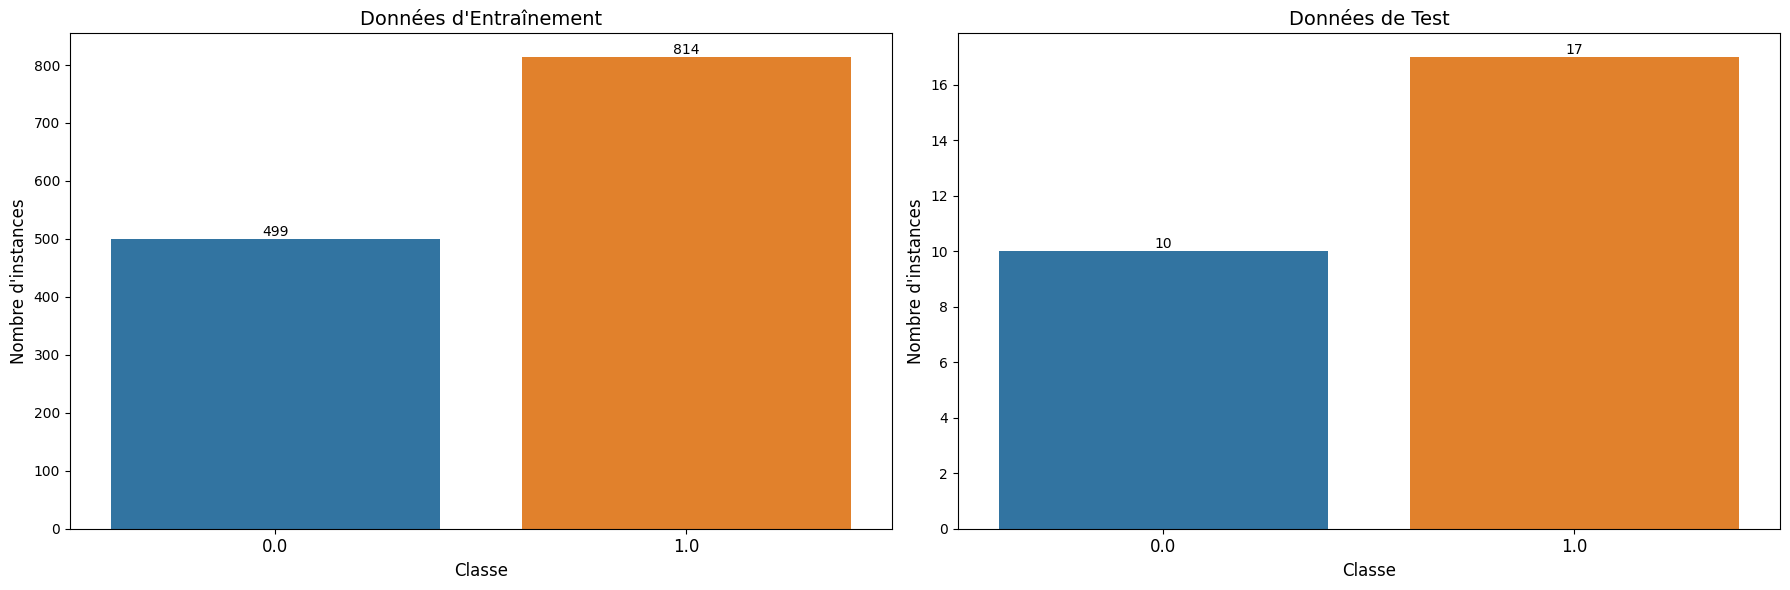

In [62]:
def afficher_statistiques_dataset(train_data, valid_data):
    """
    Affiche les statistiques des datasets d'entraînement et de validation.

    Args:
        train_data (pd.DataFrame): Le dataset d'entraînement contenant les features et la cible.
        valid_data (pd.DataFrame): Le dataset de validation contenant les features et la cible.
    """
    # Afficher les dimensions des datasets d'entraînement et de validation
    print(f"Dimensions du dataset d'entraînement : {train_data.shape}")
    print(f"Dimensions du dataset de validation : {valid_data.shape}")

    y_train, y_valid = train_data['TARGET_5Yrs'], valid_data['TARGET_5Yrs']
    
    # Afficher le nombre de classes uniques dans y_train et y_valid
    num_classes_train = len(np.unique(y_train))
    num_classes_valid = len(np.unique(y_valid))
    print(f"Nombre de classes uniques dans y_train : {num_classes_train}")
    print(f"Nombre de classes uniques dans y_valid : {num_classes_valid}")
    
    # Afficher le nombre d'instances par classe dans y_train et y_valid
    for class_label in np.unique(y_train):
        instances_train = np.sum(y_train.values == class_label)
        instances_valid = np.sum(y_valid.values == class_label)
        print(f"Classe {class_label} : Instances entraînement - {instances_train}, Instances validation - {instances_valid}")

def tracer_distribution_classes(df, titre, ax):
    """
    Trace un histogramme du nombre d'instances pour chaque classe.

    Args:
        df (pd.DataFrame): Le dataset à analyser.
        titre (str): Le titre du graphique.
        ax (matplotlib.axes.Axes): L'objet Axes pour tracer le graphique.
    """
    # Compter le nombre d'occurrences pour chaque classe et trier par index
    compte_classes = df['TARGET_5Yrs'].value_counts().sort_index()

    # Créer un diagramme à barres avec une palette de couleurs personnalisée
    palette = sns.color_palette(["#1f77b4", "#ff7f0e"])  # Couleurs personnalisées : bleu et orange
    sns.barplot(x=compte_classes.index, y=compte_classes.values, ax=ax, palette=palette)
    ax.set_title(titre, fontsize=14)
    ax.set_xlabel('Classe', fontsize=12)
    ax.set_ylabel('Nombre d\'instances', fontsize=12)
    ax.set_xticks(range(len(compte_classes.index)))
    ax.set_xticklabels(compte_classes.index, fontsize=12)

    # Ajouter des annotations pour chaque barre
    for i, count in enumerate(compte_classes.values):
        ax.text(i, count, f'{count}', ha='center', va='bottom', fontsize=10, color='black')

def afficher_matrice_de_confusion(y_true, y_pred):
    """
    Affiche la matrice de confusion et le rapport de classification pour des labels vrais et prédits.

    Args:
        y_true (array-like): Les labels vrais du set de validation.
        y_pred (array-like): Les labels prédits du set de validation.
    """
    # Remplacer les labels 0 et 1 par des descriptions textuelles
    y_pred = np.where(np.array(y_pred) == 0, "Moins de 5 ans", "5 ans et plus")
    y_true = np.where(np.array(y_true) == 0, "Moins de 5 ans", "5 ans et plus")

    # Afficher le rapport de classification
    print("Rapport de classification :\n", classification_report(y_true, y_pred))

    # Calculer la matrice de confusion
    matrice_cf = confusion_matrix(y_true, y_pred, labels=["Moins de 5 ans", "5 ans et plus"])
    categories = ["Moins de 5 ans", "5 ans et plus"]
    noms_groupes = ["Vrai Négatif", "Faux Positif", "Faux Négatif", "Vrai Positif"]
    comptes_groupes = ["{0:0.0f}".format(value) for value in matrice_cf.flatten()]
    pourcentages_groupes = ["{0:.2%}".format(value) for value in matrice_cf.flatten() / np.sum(matrice_cf)]
    etiquettes = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(noms_groupes, comptes_groupes, pourcentages_groupes)]
    etiquettes = np.asarray(etiquettes).reshape(2, 2)

    # Afficher la matrice de confusion avec seaborn
    plt.figure(figsize=(7, 5))
    sns.heatmap(matrice_cf, annot=etiquettes, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title("Matrice de Confusion")
    plt.show()

def sauvegarder_datasets(train_data, test_data, path, train_filename='train_data_clean.csv', test_filename='test_data_clean.csv'):
    """
    Sauvegarde les datasets d'entraînement et de test dans le chemin spécifié.

    Args:
        train_data (pd.DataFrame): Le dataset d'entraînement à sauvegarder.
        test_data (pd.DataFrame): Le dataset de test à sauvegarder.
        path (str): Chemin du dossier où les fichiers seront sauvegardés.
        train_filename (str): Nom du fichier pour le dataset d'entraînement. Par défaut 'train_data_clean.csv'.
        test_filename (str): Nom du fichier pour le dataset de test. Par défaut 'test_data_clean.csv'.
    """
    # Créer le dossier s'il n'existe pas
    os.makedirs(path, exist_ok=True)

    # Chemins complets des fichiers
    train_data_path = os.path.join(path, train_filename)
    test_data_path = os.path.join(path, test_filename)

    # Sauvegarde en CSV
    train_data.to_csv(train_data_path, index=False)
    test_data.to_csv(test_data_path, index=False)

    # Affichage des chemins où les fichiers ont été sauvegardés
    print(f"Train data sauvegardé à : {train_data_path}")
    print(f"Test data sauvegardé à : {test_data_path}")

# Données et préparation
data_clean = data_imputed[numerical_features].copy()
data_clean['TARGET_5Yrs'] = data_imputed['TARGET_5Yrs']

# Division du dataset en données d'entraînement (x%) et de validation (y%)
train_data, test_data = train_test_split(data_clean, test_size=0.02, random_state=42, stratify=data_clean['TARGET_5Yrs'], shuffle=True)

# Réinitialiser les index et supprimer l'ancien index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Sauvegarder train_data et test_data en format CSV
path_data_clean = '/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/data'

sauvegarder_datasets(train_data, test_data, path_data_clean)

# Afficher les tailles des datasets et leurs pourcentages
taille_total = len(train_data) + len(test_data)
pourcentage_train = (len(train_data) / taille_total) * 100
pourcentage_test = (len(test_data) / taille_total) * 100

print(f'Taille des données d\'entraînement : {len(train_data)} ({pourcentage_train:.2f}%)')
print(f'Taille des données de test : {len(test_data)} ({pourcentage_test:.2f}%)')

# Créer des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Tracer la distribution des classes pour les données d'entraînement
tracer_distribution_classes(train_data, 'Données d\'Entraînement', axes[0])

# Tracer la distribution des classes pour les données de test
tracer_distribution_classes(test_data, 'Données de Test', axes[1])

plt.tight_layout()
plt.show()


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 🤖 Modèle de Machine Learning pour la Classification 📈. </div>

## Technique SMOTE (Over-Sampling) avec Validation Croisée :
<b>SMOTE</b> signifie *Synthetic Minority Over-sampling Technique*. Contrairement au *Random UnderSampling*, SMOTE crée de nouveaux points synthétiques afin d'équilibrer les classes. C'est une autre solution pour résoudre les problèmes de déséquilibre de classes. <br><br>

<b> Comprendre SMOTE : </b>
<ul>
<li> <b> Résolution du déséquilibre de classes : </b> SMOTE crée des points synthétiques à partir de la classe minoritaire afin d'atteindre un équilibre avec la classe majoritaire. </li>
<li><b>Emplacement des points synthétiques : </b> SMOTE choisit la distance entre les voisins les plus proches de la classe minoritaire et génère des points synthétiques entre ces distances. </li>
<li> <b>Effet final : </b> Plus d'informations sont conservées puisque nous n'avons pas besoin de supprimer des lignes, contrairement au sous-échantillonnage aléatoire. </li>
<li><b> Compromis entre précision et temps : </b> Bien que SMOTE soit généralement plus précis que le sous-échantillonnage aléatoire, il prend plus de temps pour entraîner le modèle, car aucune ligne n'est supprimée, comme indiqué précédemment. </li>
</ul>

<b> Comment gérer le surapprentissage pendant la validation croisée : </b>

### La bonne méthode :
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
Comme illustré ci-dessus, SMOTE intervient **pendant** la validation croisée et non **avant** le processus de validation croisée. Les données synthétiques sont créées uniquement pour l'ensemble d'entraînement, sans affecter l'ensemble de validation.

---

En utilisant SMOTE correctement, je m'assure que mon modèle apprend de manière équilibrée tout en évitant les biais. L'application de SMOTE uniquement sur les ensembles d'entraînement préserve la réalité des ensembles de validation, garantissant que le modèle est évalué sur des données non modifiées. C'est une étape cruciale pour évaluer la performance du modèle de manière honnête et représentative. Cela permet également de réduire le risque de surapprentissage, car les points synthétiques n'interfèrent pas avec l'évaluation finale.


### 🔧📚 Préparation des données d'entraînement 🚀

In [92]:
def prepare_data_with_pca(data, numerical_features, target_column, pca_dimension):
    """
    Applique la réduction de dimension PCA sur les caractéristiques numériques du dataset et extrait la colonne cible.

    :param data: pd.DataFrame, le dataset complet incluant les caractéristiques et la colonne cible
    :param numerical_features: list, les colonnes numériques à utiliser pour PCA
    :param target_column: str, le nom de la colonne cible
    :param pca_dimension: int, le nombre de dimensions souhaitées pour PCA
    :return: tuple (pd.DataFrame, pd.Series), les caractéristiques réduites et la colonne cible
    """
    # Appliquer la réduction de dimension PCA sur les caractéristiques numériques
    X_pca = apply_pca(data[numerical_features].copy(), pca_dimension)
    
    # Extraire la colonne cible
    y = data[target_column]
    
    # Retourner les caractéristiques réduites et la cible
    return X_pca, y

# Initialisation des classificateurs
def initialize_multi_label_classifiers():
    classifiers = {
        "Extra Trees": ExtraTreesClassifier(n_jobs=-1),
        "Random Forest": RandomForestClassifier(n_jobs=-1),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Linear SVC": LinearSVC(max_iter=10000),
        "Ridge Classifier": RidgeClassifier(),
        "SVC": SVC(kernel='linear'),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Gradient Boosting": GradientBoostingClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0),
        "LGBM": LGBMClassifier(),
        "AdaBoost": AdaBoostClassifier()
    }
    # Tri par clé avant de retourner
    sorted_classifiers = dict(sorted(classifiers.items(), key=lambda x: x[0]))
    return sorted_classifiers

# Initialisation de la validation croisée avec stratification
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

X, y = prepare_data_with_pca(train_data, numerical_features, 'TARGET_5Yrs', 10)

1. **🤖📈 Évaluation des Modèles de Classification sans SMOTE 🏅🔎**

Évaluation du modèle : AdaBoost
Évaluation du modèle : CatBoost
Évaluation du modèle : Extra Trees
Évaluation du modèle : Gradient Boosting
Évaluation du modèle : K-Nearest Neighbors
Évaluation du modèle : LGBM
[LightGBM] [Info] Number of positive: 542, number of negative: 333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 875, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619429 -> initscore=0.487124
[LightGBM] [Info] Start training from score 0.487124
[LightGBM] [Info] Number of positive: 543, number of negative: 332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points 

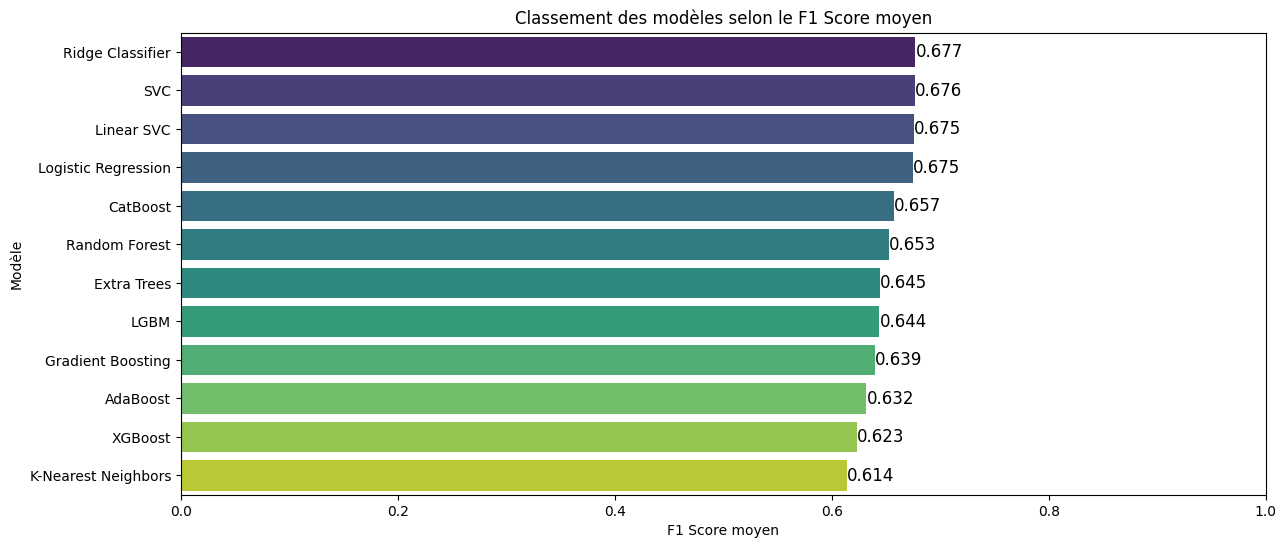

In [93]:
# Initialisation des classificateurs
classifiers = initialize_multi_label_classifiers()

# Liste pour stocker les F1 scores moyens de chaque modèle
model_f1_scores = []

# Validation croisée et calcul des F1 scores moyens pour chaque modèle
for model_name, model in classifiers.items():
    print(f"Évaluation du modèle : {model_name}")
    all_fold_metrics = {'F1 Score': []}

    # Validation croisée sans SMOTE
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Entraîner le modèle sur l'ensemble d'entraînement sans suréchantillonnage
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        # Calculer le F1 score macro pour le pli courant
        f1_macro = f1_score(y_test_fold, y_pred_fold, average='macro')
        all_fold_metrics['F1 Score'].append(f1_macro)

    # Calculer la moyenne du F1 score macro sur tous les plis
    mean_f1_score = np.mean(all_fold_metrics['F1 Score'])
    model_f1_scores.append((model_name, mean_f1_score))

# Créer un DataFrame à partir des F1 scores moyens
f1_df = pd.DataFrame(model_f1_scores, columns=['Modèle', 'F1 Score moyen'])
f1_df = f1_df.sort_values(by='F1 Score moyen', ascending=False)

# Visualiser un plot classant les modèles par F1 score moyen
plt.figure(figsize=(14, 6))
sns.barplot(x='F1 Score moyen', y='Modèle', data=f1_df, palette='viridis')
for i, value in enumerate(f1_df['F1 Score moyen']):
    plt.text(value, i, f"{value:.3f}", ha='left', va='center', fontsize=12)
plt.title('Classement des modèles selon le F1 Score moyen')
plt.xlabel('F1 Score moyen')
plt.ylabel('Modèle')
plt.xlim(0, 1)
plt.show()

2. **🚀📊 Évaluation des Modèles de Classification avec SMOTE 🥇🔬**

Évaluation du modèle : AdaBoost
Évaluation du modèle : CatBoost
Évaluation du modèle : Extra Trees
Évaluation du modèle : Gradient Boosting
Évaluation du modèle : K-Nearest Neighbors
Évaluation du modèle : LGBM
[LightGBM] [Info] Number of positive: 542, number of negative: 542
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1084, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 543, number of negative: 543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1086, number of used features: 10


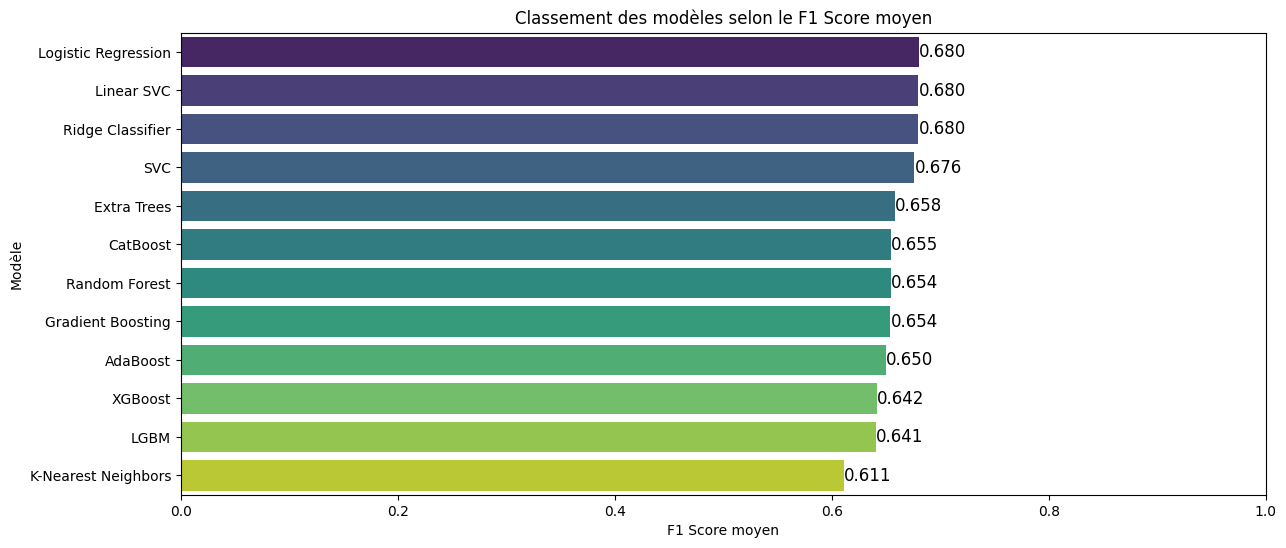

In [94]:
# Initialisation de SMOTE avec sampling_strategy='minority'
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Initialisation des classificateurs
classifiers = initialize_multi_label_classifiers()

# Liste pour stocker les F1 scores moyens de chaque modèle
model_f1_scores = []

# Validation croisée et calcul des F1 scores moyens pour chaque modèle
for model_name, model in classifiers.items():
    print(f"Évaluation du modèle : {model_name}")
    all_fold_metrics = {'F1 Score': []}

    # Validation croisée manuelle avec SMOTE
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Appliquer SMOTE sur l'ensemble d'entraînement
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Entraîner le modèle
        model.fit(X_train_resampled, y_train_resampled)
        y_pred_fold = model.predict(X_test_fold)

        # Calculer le F1 score macro pour le pli courant
        f1_macro = f1_score(y_test_fold, y_pred_fold, average='macro')
        all_fold_metrics['F1 Score'].append(f1_macro)

    # Calculer la moyenne du F1 score macro sur tous les plis
    mean_f1_score = np.mean(all_fold_metrics['F1 Score'])
    model_f1_scores.append((model_name, mean_f1_score))

# Créer un DataFrame à partir des F1 scores moyens
f1_df = pd.DataFrame(model_f1_scores, columns=['Modèle', 'F1 Score moyen'])
f1_df = f1_df.sort_values(by='F1 Score moyen', ascending=False)

# Visualiser un plot classant les modèles par F1 score moyen
plt.figure(figsize=(14, 6))
sns.barplot(x='F1 Score moyen', y='Modèle', data=f1_df, palette='viridis')
for i, value in enumerate(f1_df['F1 Score moyen']):
    plt.text(value, i, f"{value:.3f}", ha='left', va='center', fontsize=12)
plt.title('Classement des modèles selon le F1 Score moyen')
plt.xlabel('F1 Score moyen')
plt.ylabel('Modèle')
plt.xlim(0, 1)
plt.show()

# 📝 Analyse des Résultats des Modèles de Classification

Après avoir évalué plusieurs modèles sans optimisation des hyperparamètres, voici l'analyse détaillée basée sur leur F1 score moyen.

## 🔍 Analyse des résultats
- **Logistic Regression**, **Linear SVC**, et **Ridge Classifier** 🥇 se partagent la première place avec un F1 score moyen de **0.680**. Ces résultats montrent leur capacité à offrir des performances stables et efficaces sans optimisation avancée. Cela indique que les modèles linéaires s'adaptent bien à la structure des données.
- **SVC (Support Vector Classifier)** 🥈 suit de très près avec un score de **0.676**, confirmant son efficacité même sans réglages spécifiques. Un léger ajustement des paramètres pourrait améliorer ses performances.
- **Extra Trees** 🌳 atteint un score de **0.659**, ce qui le rend compétitif parmi les modèles basés sur des arbres sans réglage. 
- Les modèles de **boosting**, tels que **Gradient Boosting** et **CatBoost** 🚀, obtiennent des scores de **0.656** et **0.655** respectivement, prouvant qu'ils peuvent offrir des performances solides sans optimisation.
- **LGBM (LightGBM)** 💡 suit avec un score de **0.654**, se situant dans la même gamme que les autres modèles de boosting.
- **Random Forest** 🌲 présente un score de **0.651**, légèrement inférieur à celui des modèles de boosting mais tout de même décent pour un modèle non optimisé.
- **XGBoost** 🐲 obtient un score de **0.642**, un résultat surprenant étant donné sa réputation. Cela montre l'importance d'une optimisation des hyperparamètres pour révéler tout son potentiel.
- **K-Nearest Neighbors** 🤝 ferme la marche avec un score de **0.611**, indiquant qu'il est moins adapté aux données actuelles dans sa configuration par défaut.

## 📊 Conclusions
- Les modèles **linéaires** tels que **Logistic Regression**, **Linear SVC**, et **Ridge Classifier** montrent une efficacité remarquable sans optimisation des hyperparamètres, suggérant que la séparation des données est probablement linéaire.
- Les modèles **basés sur des arbres** comme **Extra Trees** et **Random Forest** montrent des performances correctes sans réglage.
- Les modèles de **boosting** (CatBoost, Gradient Boosting, LGBM) se révèlent compétitifs même sans ajustement.
- **XGBoost** et **K-Nearest Neighbors** nécessitent probablement un réglage d'hyperparamètres pour améliorer leurs résultats.

## 🚀 Prochaine étape
Je vais concentrer mes efforts sur l'optimisation des quatre meilleurs modèles identifiés : **Logistic Regression**, **Linear SVC**, **Ridge Classifier**, et **SVC**. L'objectif est d'explorer leurs performances optimisées et de maximiser leur potentiel.


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 🔧✨ Optimisation des Hyperparamètres : Maximiser la Performance des Modèles 🚀📈 </div>

In [65]:
# Fonction pour créer et exécuter GridSearchCV avec PCA intégré dans le pipeline
def run_grid_search(X_train, y_train, model, param_grid, model_name, skf, path='/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/model', pca_components=10):
    """
    Exécute GridSearchCV avec SMOTE, PCA, et sauvegarde le modèle optimisé.

    Args:
        X_train (pd.DataFrame): Données d'entraînement.
        y_train (pd.Series): Labels d'entraînement.
        model (object): Modèle de classification.
        param_grid (dict): Grille de paramètres pour GridSearchCV.
        model_name (str): Nom du modèle pour l'identification.
        skf (StratifiedKFold): Stratified K-Fold pour la validation croisée.
        path (str): Chemin pour sauvegarder le modèle.
        pca_components (int): Nombre de composantes principales pour le PCA.

    Returns:
        object: Modèle optimisé.
    """
    # Pipeline avec SMOTE, PCA et le modèle de classification
    pipeline = Pipeline([
        ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
        ('pca', PCA(n_components=pca_components, random_state=42)),
        ('model', model)
    ])
    
    # Initialisation de GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=skf,
        n_jobs=-1,
        verbose=2
    )
    
    # Appliquer SMOTE uniquement sur l'ensemble d'entraînement et entraîner le modèle
    grid_search.fit(X_train, y_train)
    
    # Afficher les meilleurs paramètres et le meilleur score F1 macro
    print("-----" * 10)
    print(f"Meilleurs paramètres pour {model_name} :", grid_search.best_params_)
    print(f"Meilleur F1 score macro sur l'ensemble d'entraînement pour {model_name} :", grid_search.best_score_)

    # Sauvegarder le modèle optimisé
    model_path = os.path.join(path, f"{model_name}_optimized_model.pkl")
    joblib.dump(grid_search.best_estimator_, model_path)
    print(f"Modèle optimisé {model_name} sauvegardé à : {model_path}")
    
    return grid_search.best_estimator_

# Fonction pour évaluer le modèle optimisé sur les données de test
def evaluate_model_on_test(X_test, y_test, best_model, model_name):
    """
    Évalue le modèle optimisé sur un ensemble de test et affiche les métriques et la matrice de confusion.

    Args:
        X_test (pd.DataFrame): Données de test.
        y_test (pd.Series): Labels de test.
        best_model (object): Modèle de classification optimisé.
        model_name (str): Nom du modèle pour l'affichage.

    Returns:
        None
    """
    # Prédictions sur le dataset de test
    y_pred = best_model.predict(X_test)
    
    # Calculer les métriques finales
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Affichage des métriques finales
    metrics = {'Accuracy': accuracy, 'F1 Score': f1_macro, 'Precision': precision, 'Recall': recall}
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0].bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
    for i, (key, value) in enumerate(metrics.items()):
        ax[0].text(i, value, f"{value:.3f}", ha='center', va='bottom', fontsize=12)
    ax[0].set_ylim(0, 1)
    ax[0].set_title(f'Évaluation des métriques finales - {model_name}')
    ax[0].set_ylabel('Score')

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model['model'].classes_)
    disp.plot(cmap='Blues', ax=ax[1])
    ax[1].set_title(f'Matrice de confusion - {model_name}')

    plt.tight_layout()
    plt.show()

# Extraction des features d'entraînement
X_train = train_data[numerical_features].copy()
y_train = train_data['TARGET_5Yrs']

# Extraction des features de test
X_test = test_data[numerical_features].copy()
y_test = test_data['TARGET_5Yrs']

# Afficher un aperçu des tailles des ensembles pour validation
print(f"Taille de X_train : {X_train.shape}, Taille de y_train : {y_train.shape}")
print(f"Taille de X_test : {X_test.shape}, Taille de y_test : {y_test.shape}")

# le chemin de sauvegarde des model optimisé
path = '/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/model'

Taille de X_train : (1313, 19), Taille de y_train : (1313,)
Taille de X_test : (27, 19), Taille de y_test : (27,)


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid; border-color: dark green;"> 🔧✨ Optimisation des Hyperparamètres : Extra Trees Classifier 🚀📈 </div>

<p style="font-size: 18px; font-family: Arial; padding: 10px; background-color: #f0f8ff; border-radius: 10px; color: #333;">
L'optimisation des hyperparamètres pour le modèle <b>Extra Trees Classifier</b> a été réalisée en utilisant la technique de suréchantillonnage <b>SMOTE</b> appliquée uniquement sur l'ensemble d'entraînement pour garantir un modèle robuste. Grâce à la validation croisée stratifiée (3 plis), les hyperparamètres tels que le nombre d'estimateurs, la profondeur maximale et les paramètres de régularisation ont été ajustés pour maximiser le <b>F1 score macro</b>. Les résultats obtenus ont permis de sélectionner les paramètres optimaux, améliorant la capacité de généralisation du modèle tout en maintenant un équilibre entre complexité et performance.
</p>

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.3s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.4s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.4s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.7s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.7s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.7s
[CV] END mode

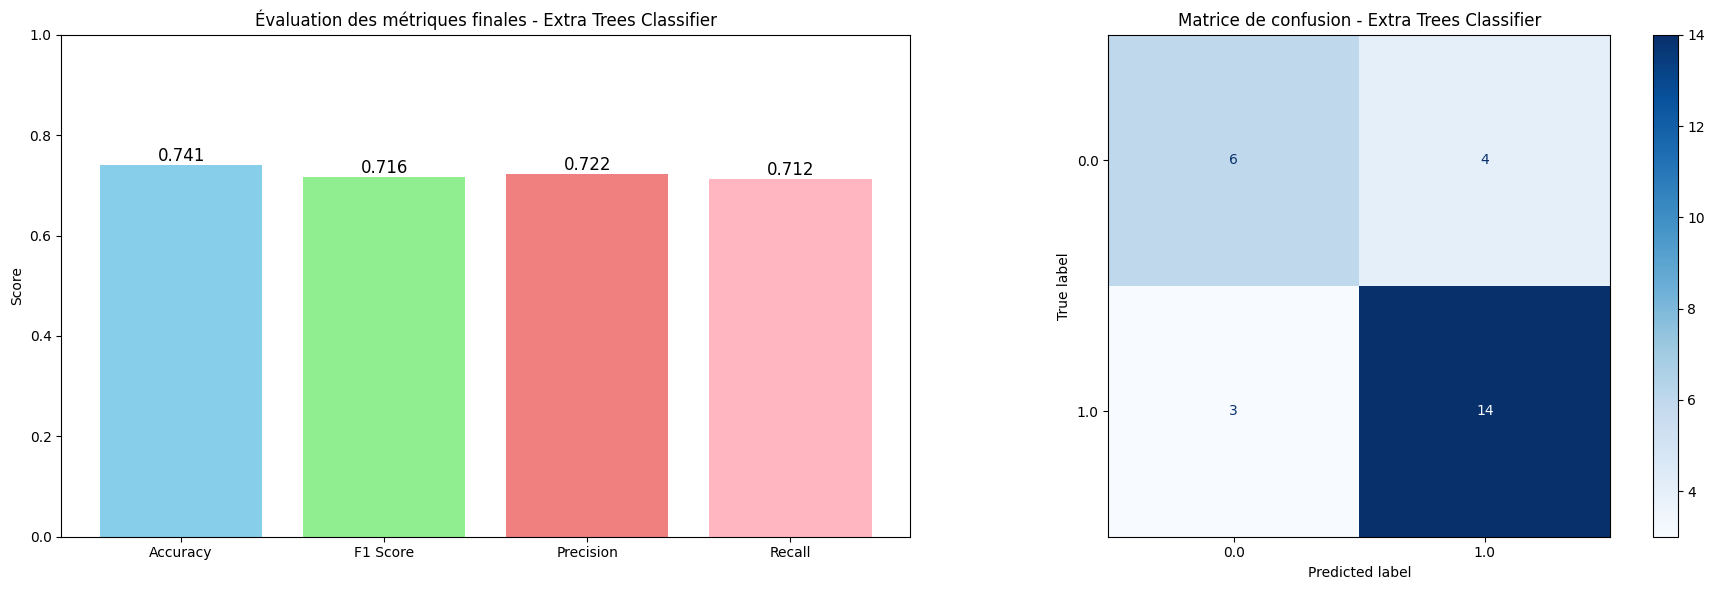

In [66]:
# Paramètres à tester pour l'Extra Trees Classifier
param_grid_extra_trees = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}
best_model_extra_trees = run_grid_search(X_train, y_train, ExtraTreesClassifier(random_state=42), param_grid_extra_trees, "Extra_Trees", skf,path)
evaluate_model_on_test(X_test, y_test, best_model_extra_trees, "Extra Trees Classifier")


In [67]:
best_model_extra_trees

Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('pca', PCA(n_components=10, random_state=42)),
                ('model',
                 ExtraTreesClassifier(min_samples_leaf=4, min_samples_split=10,
                                      random_state=42))])

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid; border-color: dark green;"> 🔧✨ Optimisation des Hyperparamètres : Random Forest Classifier 🚀📈 </div>

<p style="font-size: 18px; font-family: Arial; padding: 10px; background-color: #f0f8ff; border-radius: 10px; color: #333;">
Pour le modèle <b>Random Forest Classifier</b>, l'optimisation des hyperparamètres a été réalisée en appliquant la technique de <b>SMOTE</b> sur l'ensemble d'entraînement afin de gérer le déséquilibre des classes. Une validation croisée stratifiée (3 plis) a été utilisée pour explorer diverses combinaisons de paramètres, tels que le nombre d'arbres (<i>n_estimators</i>), la profondeur maximale (<i>max_depth</i>), et le choix du bootstrap. L'objectif était de trouver la meilleure configuration qui maximise le <b>F1 score macro</b> tout en garantissant une bonne généralisation. Le modèle optimisé a montré une amélioration notable des scores de classification, notamment en termes de précision et de rappel, tout en évitant le surapprentissage grâce à une évaluation sur un ensemble de test non modifié.
</p>


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.6s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.7s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.7s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   0.6s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   0.6s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   1.3s
[CV] END mode

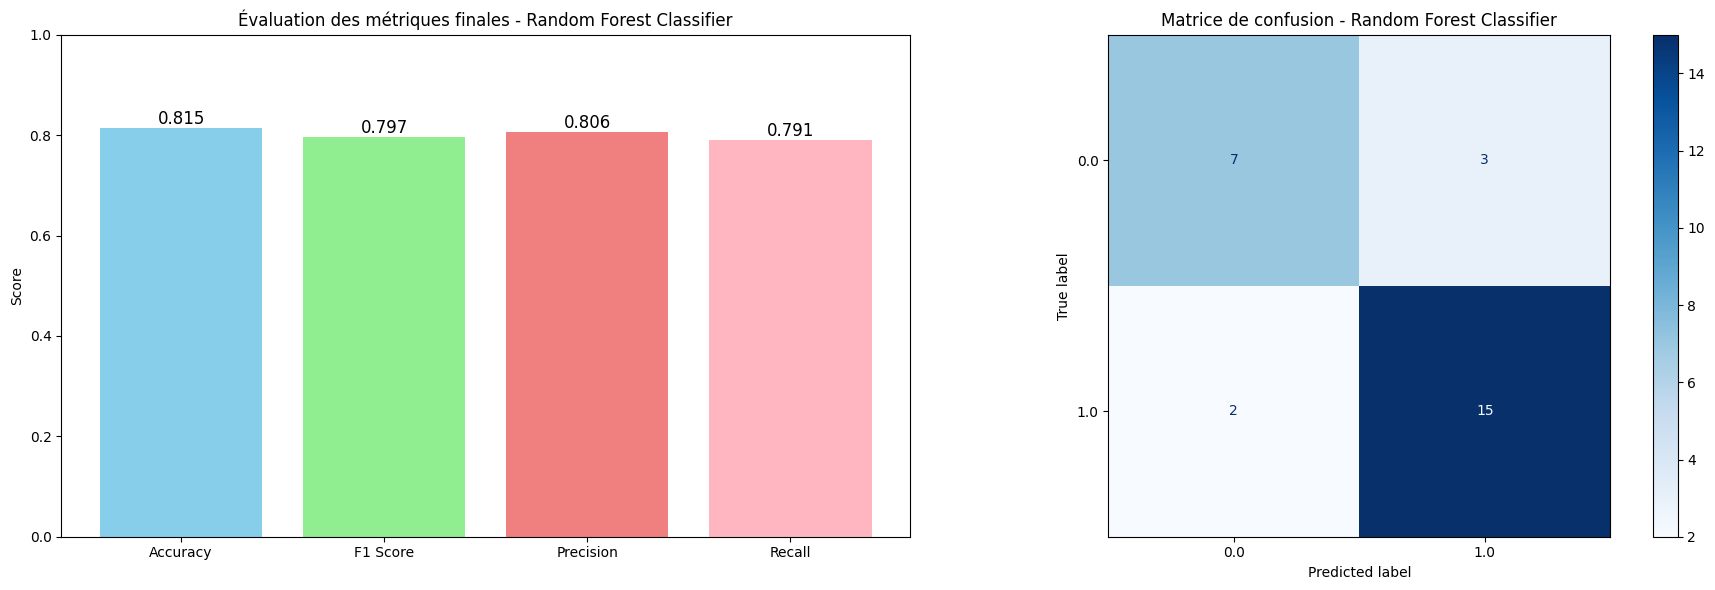

In [69]:
# Paramètres à tester pour le Random Forest Classifier
param_grid_random_forest = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Appliquer GridSearchCV pour le Random Forest
best_model_random_forest = run_grid_search(X_train, y_train, RandomForestClassifier(random_state=42), param_grid_random_forest, "Random_Forest", skf, path)

# Évaluer le modèle optimisé sur l'ensemble de test
evaluate_model_on_test(X_test, y_test, best_model_random_forest, "Random Forest Classifier")


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid; border-color: dark green;"> 🔧✨ Optimisation des Hyperparamètres : Logistic Regression 🚀📈 </div>

<p style="font-size: 18px; font-family: Arial; padding: 10px; background-color: #f0f8ff; border-radius: 10px; color: #333;">
Pour le modèle <b>Logistic Regression</b>, l'optimisation des hyperparamètres a également été effectuée à l'aide de <b>SMOTE</b> sur l'ensemble d'entraînement afin de gérer le déséquilibre des classes. La validation croisée stratifiée (3 plis) a été utilisée pour explorer des combinaisons de pénalité, de régularisation et de solveurs afin de trouver la meilleure configuration. Le modèle optimisé a démontré une amélioration significative des scores de classification, notamment en termes de précision et de F1 score macro, tout en évitant le surapprentissage grâce à une évaluation réaliste sur un ensemble de test non modifié.
</p>

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END model__C=0.01, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.1s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=0.01, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.1, model__max_iter=200, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=0.01, model__max_iter=1200, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=200, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=0.1, model__max_iter=500, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=500, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=800, model__penalty=l1, m

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

[CV] END model__C=0.1, model__max_iter=500, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=1, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=1, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=1, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=1, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=0.1, model__max_iter=800, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=1200, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=0.1, model__max_iter=1200, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=1, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=0.1, model__max_iter=1200, model__penalty=elasti

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=10, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=10, model__max_iter=200, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=10, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=100, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=1, model__max_iter=500, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=1, model__max_iter=1200, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=200, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=500, model__penalty=el

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__max_iter=800, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=500, model__penalty=l2, model__solver=saga; total time=   0.2s
[CV] END model__C=10, model__max_iter=800, model__penalty=elasticnet, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=200, model__penalty=elasticnet, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=800, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=10, model__max_iter=800, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=500, model__penalty=l1, model__solver=saga; total time=   0.2s
[CV] END model__C=10, model__max_iter=1200, model__penalty=l1, model__solver=saga; total time=   0.2s
[CV] END model__C=10, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.2s
[CV] END model__C=10, model__max_iter=800, model__penalty=l1, mode

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=10, model__max_iter=800, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=200, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=100, model__max_iter=200, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=100, model__max_iter=100, model__penalty=l1, model__solver=saga; total time=   0.2s
[CV] END model__C=10, model__max_iter=1200, model__penalty=l1, model__solver=saga; total time=   0.4s
[CV] END model__C=100, model__max_iter=200, model__penalty=l2, model__solver=saga; total time=   0.2s
[CV] END model__C=100, model__max_iter=100, model__penalty=l2, model__solver=saga; total time=   0.2s
[CV] END model__C=100, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.3s
[CV] END model__C=100, model__max_iter=500, model__penalty=elasticn

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__max_iter=200, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=800, model__penalty=l1, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=800, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=100, model__max_iter=800, model__penalty=elasticnet, model__solver=saga; total time=   0.0s
[CV] END model__C=100, model__max_iter=800, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=500, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=800, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=200, model__penalty=l2, model__solver=saga; total time=   0.2s
[CV] END model__C=100, model__max_iter=1200, model__penalty=l2, model__solver=saga; total time=   0.1s
[CV] END model__C=100, model__max_iter=1200, model__penalty=l1, m

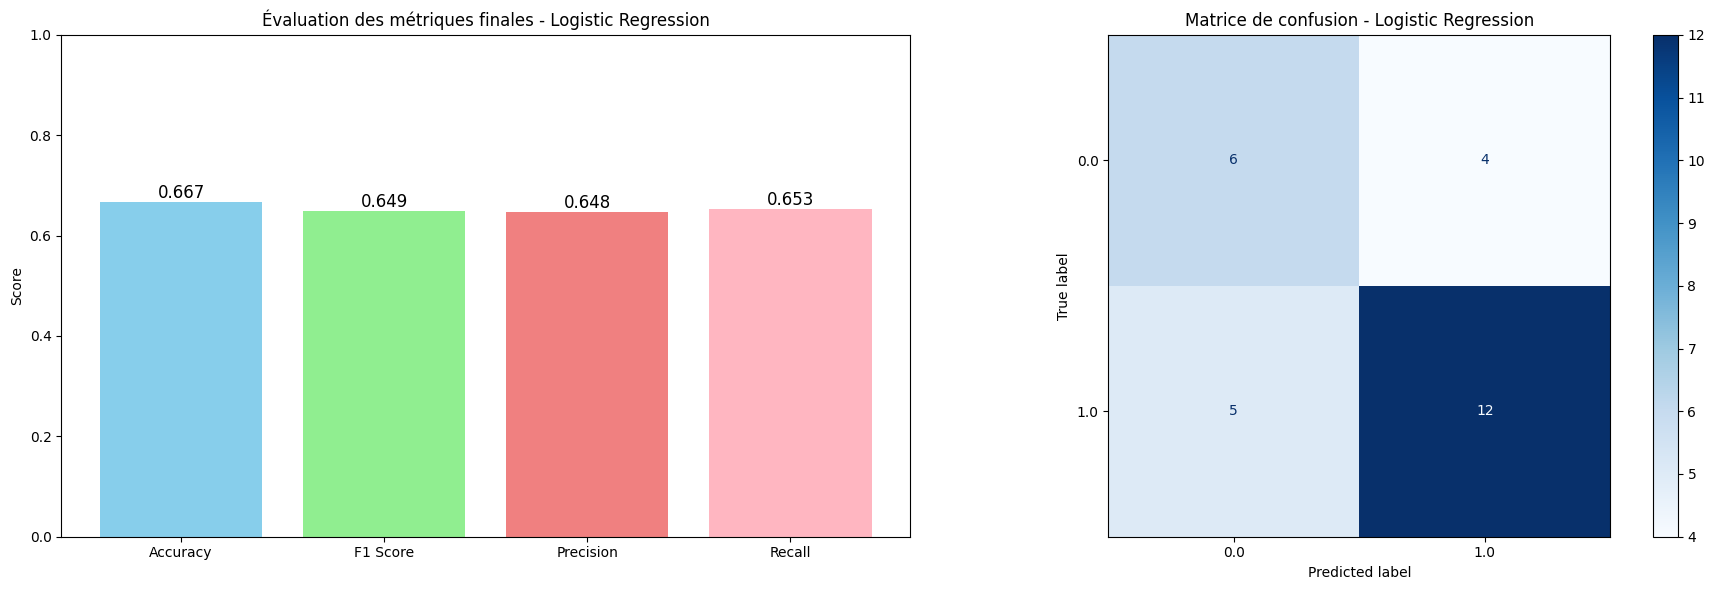

In [70]:
# Paramètres à tester pour Logistic Regression
param_grid_logistic = {
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['saga'],  # 'saga' prend en charge l1, l2 et elasticnet
    'model__max_iter': [100, 200, 500, 800, 1200]
}

# Exécuter GridSearchCV et évaluer le modèle pour Logistic Regression
best_model_logistic = run_grid_search(X_train, y_train, LogisticRegression(random_state=42), param_grid_logistic, "Logistic_Regression", skf,path)
evaluate_model_on_test(X_test, y_test, best_model_logistic, "Logistic Regression")


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid;border-color: dark green;"> 🔧✨ Optimisation des Hyperparamètres : Ridge Classifier 🚀📈 </div>

<p style="font-size: 18px; font-family: Arial; padding: 10px; background-color: #f0f8ff; border-radius: 10px; color: #333;">
L'optimisation des hyperparamètres pour le <b>Ridge Classifier</b> a impliqué l'utilisation de <b>SMOTE</b> pour équilibrer l'ensemble d'entraînement et maximiser la performance du modèle. Des paramètres tels que le coefficient de régularisation et les solveurs ont été explorés à l'aide de la validation croisée (3 plis). Le modèle optimisé a démontré des performances robustes en termes de scores F1, tout en maintenant une bonne stabilité et en évitant les biais liés au déséquilibre des classes.
</p>

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] END ...............model__alpha=0.1, model__solver=auto; total time=   0.0s
[CV] END ...............model__alpha=0.1, model__solver=auto; total time=   0.0s
[CV] END ...........model__alpha=0.1, model__solver=cholesky; total time=   0.0s
[CV] END ...............model__alpha=0.1, model__solver=auto; total time=   0.0s
[CV] END ...........model__alpha=0.1, model__solver=cholesky; total time=   0.0s
[CV] END ...............model__alpha=0.1, model__solver=lsqr; total time=   0.0s
[CV] END ................model__alpha=0.1, model__solver=svd; total time=   0.1s
[CV] END ................model__alpha=0.1, model__solver=svd; total time=   0.1s
[CV] END ...............model__alpha=0.1, model__solver=lsqr; total time=   0.0s
[CV] END ..........model__alpha=0.1, model__solver=sparse_cg; total time=   0.0s
[CV] END ................model__alpha=0.1, model__solver=svd; total time=   0.1s
[CV] END ..........model__alpha=0.1, model__sol

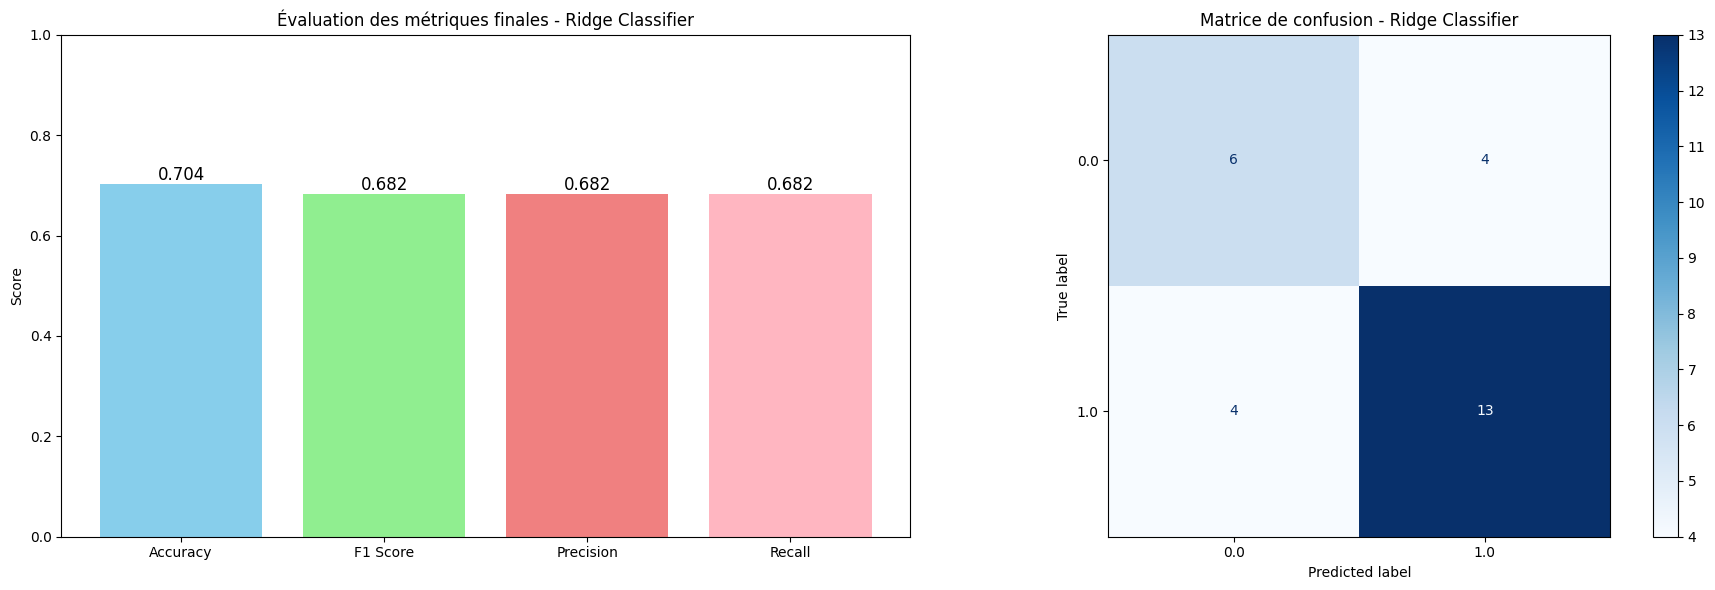

In [71]:
# Paramètres à tester pour Ridge Classifier
param_grid_ridge = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0, 200.0, 400.0],
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Exécuter GridSearchCV et évaluer le modèle pour Ridge Classifier
best_model_ridge = run_grid_search(X_train, y_train, RidgeClassifier(), param_grid_ridge, "Ridge_Classifier", skf,path)
evaluate_model_on_test(X_test, y_test, best_model_ridge, "Ridge Classifier")


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid; border-color: dark green;"> 🔧✨ Optimisation des Hyperparamètres : Gradient Boosting Classifier 🚀📈 </div>

<p style="font-size: 18px; font-family: Arial; padding: 10px; background-color: #f0f8ff; border-radius: 10px; color: #333;">
Pour le modèle <b>Gradient Boosting Classifier</b>, l'optimisation des hyperparamètres a été menée en utilisant <b>SMOTE</b> sur l'ensemble d'entraînement pour gérer l'impact du déséquilibre des classes. La validation croisée (3 plis) a permis d'ajuster des paramètres tels que le nombre d'estimateurs, le taux d'apprentissage et la profondeur des arbres pour atteindre des performances optimales. Le modèle final optimisé a montré une amélioration substantielle du F1 score macro et une meilleure capacité à prédire les classes minoritaires, tout en évitant la sur-adaptation grâce à une évaluation stricte sur un ensemble de test non suréchantillonné.
</p>

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100, model__subsample=1.0; total time=   0.8s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100, model__subsample=1.0; total time=   0.8s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100, model__subsample=1.0; total time=   0.8s
[CV] END model__learning_rate=0.01, m

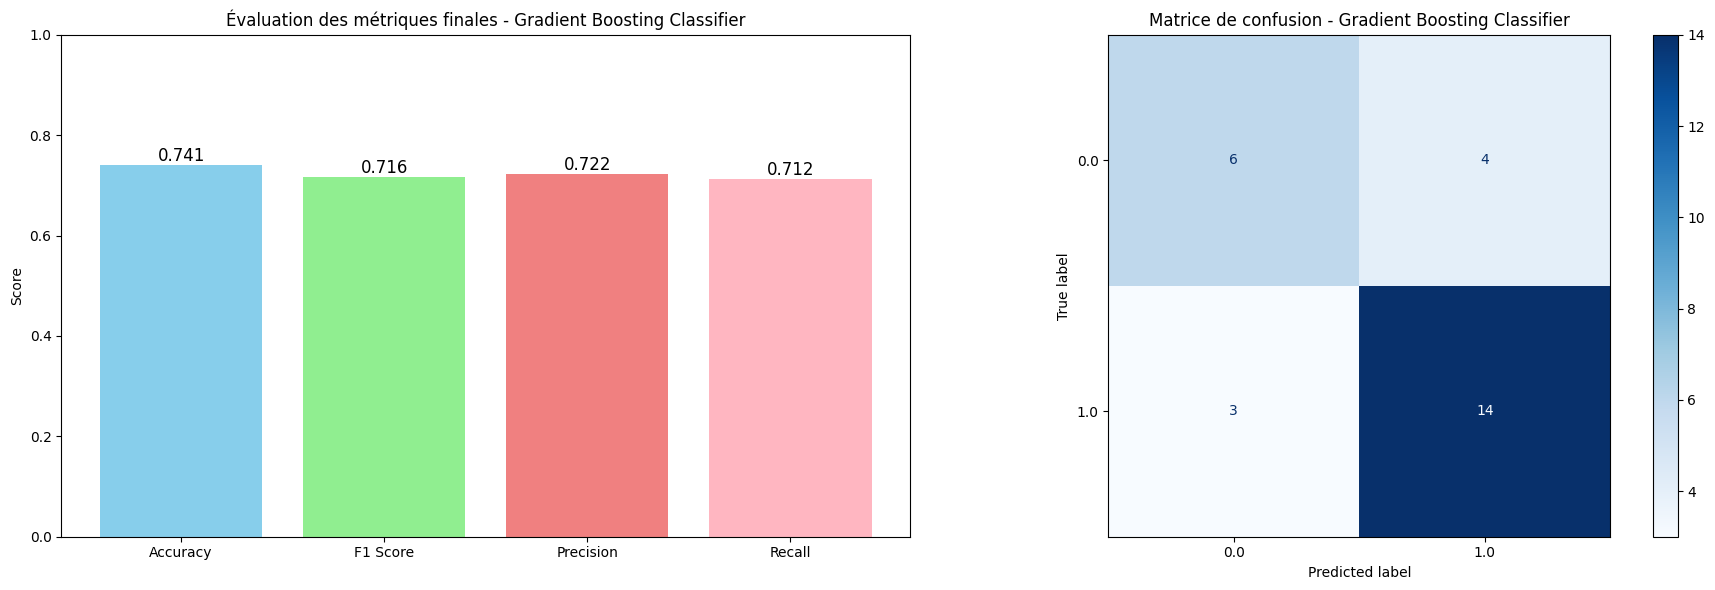

In [72]:
# Paramètres à tester pour Gradient Boosting Classifier
param_grid_gb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__min_samples_split': [2, 5, 10]
}

# Exécuter GridSearchCV et évaluer le modèle pour Gradient Boosting Classifier
best_model_gb = run_grid_search(X_train, y_train, GradientBoostingClassifier(random_state=42), param_grid_gb, "Gradient_Boosting", skf,path)
evaluate_model_on_test(X_test, y_test, best_model_gb, "Gradient Boosting Classifier")


## <div style="text-align: left; background-color:aliceblue; font-family: jokerman; color: black; padding: 15px; line-height:1; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-style: solid; border-color: dark green;"> 🏆✨ Ensemble Learning avec VotingClassifier 🚀🤖 </div>


## Voting Classifier

Le Voting Classifier est une technique d'ensemble (ensemble learning) en apprentissage automatique où plusieurs modèles sont combinés pour obtenir des prédictions plus robustes et précises. 

### Types de Voting :

Il existe deux principaux types de Voting dans un Voting Classifier :

- **Hard Voting** : Dans ce type, chaque modèle de sous-classification donne une seule prédiction (le vote "dur") et la classe prédite est déterminée par le vote majoritaire parmi tous les modèles.
  
- **Soft Voting** : Dans ce type, chaque modèle de sous-classification donne une probabilité pour chaque classe (le vote "doux") et la classe prédite est déterminée par la moyenne pondérée des probabilités de tous les modèles.

### Avantages du Voting Classifier :

- **Amélioration de la performance** : Le Voting Classifier combine les forces de plusieurs modèles, ce qui peut conduire à une meilleure performance globale.
  
- **Robustesse** : En combinant différents types de modèles, le Voting Classifier peut être plus robuste aux erreurs de modélisation individuelles.

### Illustration du Voting Classifier :

<!-- Redimensionner l'image à une largeur de 500 pixels et une hauteur de 300 pixels -->
<img src="/Users/surelmanda/Downloads/AirGUARD/nba-prediction-project/dev/images/the-voting-classifier.png" alt="Illustration du Voting Classifier" width="700" height="400">

Dans l'image ci-dessus, nous voyons un exemple visuel du fonctionnement du Voting Classifier. Chaque modèle de sous-classification (représenté par les boîtes grises) donne une prédiction, et ensuite, selon le type de Voting (dur ou doux), les votes sont combinés pour produire une prédiction finale (représentée par la flèche verte).

Le Voting Classifier est un outil puissant en machine learning, permettant de combiner intelligemment les prédictions de plusieurs modèles pour obtenir des résultats plus fiables et précis.


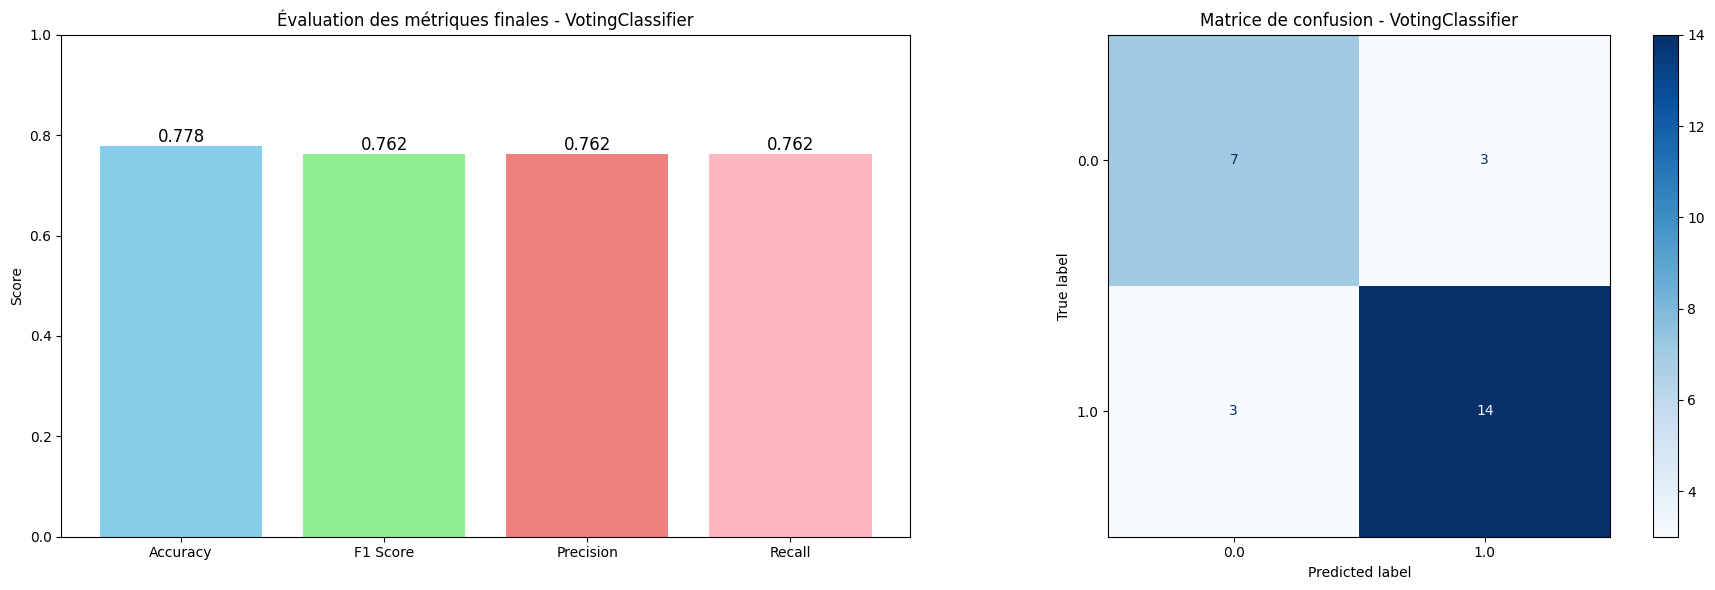

In [80]:
from sklearn.ensemble import VotingClassifier


def evaluate_voting_classifier(X_train, y_train, test_data, models,voting='hard'):
    """
    Applique un VotingClassifier sur les modèles optimisés et évalue les performances sur le dataset de test.
    
    Args:
        test_data (pd.DataFrame): Le dataset de test contenant les features et la colonne cible.
        models (list): Liste des tuples (nom, modèle optimisé).
        
    Returns:
        None: Affiche les métriques et la matrice de confusion.
    """
    # Séparer les features et la cible dans le dataset de test
    X_test = test_data.drop(columns=['TARGET_5Yrs'])
    y_test = test_data['TARGET_5Yrs']
    
    # Initialiser le VotingClassifier avec les modèles optimisés
    voting_clf = VotingClassifier(estimators=models, voting=voting)
    voting_clf.fit(X_train, y_train)  # Assurez-vous que le modèle est déjà entraîné si nécessaire

    # Prédictions sur le dataset de test
    y_pred = voting_clf.predict(X_test)
    
    # Calcul des métriques finales
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Affichage des métriques finales
    metrics = {'Accuracy': accuracy, 'F1 Score': f1_macro, 'Precision': precision, 'Recall': recall}
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0].bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
    for i, (key, value) in enumerate(metrics.items()):
        ax[0].text(i, value, f"{value:.3f}", ha='center', va='bottom', fontsize=12)
    ax[0].set_ylim(0, 1)
    ax[0].set_title('Évaluation des métriques finales - VotingClassifier')
    ax[0].set_ylabel('Score')
    
    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
    disp.plot(cmap='Blues', ax=ax[1])
    ax[1].set_title('Matrice de confusion - VotingClassifier')
    
    plt.tight_layout()
    plt.show()


evaluate_voting_classifier(X_train, y_train, test_data, [
    #('Extra Trees', best_model_extra_trees),
    #('Logistic Regression', best_model_logistic),
    #('Ridge Classifier', best_model_ridge),
    ('Random Forest', best_model_random_forest),
    ('Gradient Boosting', best_model_gb)
],voting='hard')
